# Personalized Cancer Diagnosis

# 1. Business Problem:

- classifiy the given variation/Mutation given text-based clinical literature


- When a patient seems to have a cancer ,we take a cancer tumor from the patient and we go through genetic sequencing of DNA of tumor.Once sequenced ,a cancer tumor can have thousands of genetic mutations.Here briefly a ‘mutation’ is small change in gene which causes cancer.One more important thing is for every gene there is a variation associated with it.Now with the help of gene and variation we have to classify which class(total we have 9 classes) it belongs to.Only some classes belongs to cancer

## Present flow to find the Mutation/Gene

Source:https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462

The workflow is as follows

1. A molecular pathologist selects a list of genetic variations of interest that he/she want to analyze


2. The molecular pathologist searches for evidence in the medical literature that somehow are relevant to the genetic variations of interest


3. Finally this molecular pathologist spends a huge amount of time analyzing the evidence related to each of the variations to classify them

Our goal here is to replace step 3 by a machine learning model. The molecular pathologist will still have to decide which variations are of interest, and also collect the relevant evidence for them. But the last step, which is also the most time consuming, will be fully automated.

So,the problem statement is to classify genetic variations based on evidence from the text based clinical literature or research papers .

There are total 9 Classes, so, it is a Multi Class Classification Problem.

1. **Interpretability** of the algorithm is must because a cancer specialist should understand why the model is given particular class so that he can explain to the patient.


2. **No low-latency requirement** which means patient can wait few minutes for results.As there is no low-latency requirement we can apply complex machine learning models.


3. Errors are very costly.


4. **Probability** of belonging to class is needed rather than he belongs to particular class.

## Performance Metric

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
- Multi class log-loss 
- Confusion matrix 

In [1]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

C:\Users\Aravindh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 2. Data Insights

### 2.1 Data Overview

There are two data files.
1. Gene and variation with ID
2. Text Literature

In [2]:
#check features in gene/variation data
data = pd.read_csv('training/training_variants')
print('Number of data points :' ,data.shape[0])
print('Number of features :' ,data.shape[1])
print('Features :' ,data.columns.values)
data.head()

Number of data points : 3321
Number of features : 4
Features : ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [3]:
#Check Text data
text_data = pd.read_csv('training/training_text', sep='\|\|', engine='python', names=['ID', 'TEXT'], skiprows=1)
print('Number of data points :' ,text_data.shape[0])
print('Number of features :' ,text_data.shape[1])
print('Features :' ,text_data.columns.values)
text_data.head()

Number of data points : 3321
Number of features : 2
Features : ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


# 3. Preprocessing of TEXT

In [4]:
# loading stop words from nltk library
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', " ", str(total_text))
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        text_data[column][index] = string

In [5]:
start_time = time.clock()
for index, row in text_data.iterrows():
    nlp_preprocessing(row["TEXT"], index, 'TEXT')
print('Time: %.2f sec'%(time.clock() - start_time))

Time: 109.72 sec


In [6]:
result = pd.merge(data, text_data, on='ID', how='left')
result.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


# TO-DO

<ul>
    <li> Develop ML models with tf-idf features and use top 1000 features and check log loss</li>
    <li>Apply Logistic regression with CountVectorizer Features, including both unigrams and bigrams and check log loss</li>
    <li> Do feature engineering to reduce the CV loss</li>
</ul>

# 4. Test, Train, CV Split

###### Splitting data into train, test & CV

In [7]:
y_true = result['Class'].values
result.Gene = result.Gene.str.replace('\s', '_')
result.Variation = result.Variation.str.replace('\s', '_')

# split the data into test and train by maintaining same distribution of output in train, test, CV data
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2)
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

We preserve the distribution ratio in Train, CV, Test dataset splits

In [8]:
print('Train Data :' ,train_df.shape)
print('Test Data :' ,test_df.shape)
print('CV Data :' ,cv_df.shape)

Train Data : (2124, 5)
Test Data : (665, 5)
CV Data : (532, 5)


## 4.1 TRAIN, TEST, CV Distribution Plot

In [14]:
#lets sort the distribution data index level
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = train_df['Class'].value_counts().sortlevel()
test_class_distribution = test_df['Class'].value_counts().sortlevel()
cv_class_distribution = cv_df['Class'].value_counts().sortlevel()

------------------TRAIN DATA-------------------------
Number of data points in class 7 : 609 (28.67 %) 
Number of data points in class 4 : 439 (20.67 %) 
Number of data points in class 1 : 363 (17.09 %) 
Number of data points in class 2 : 289 (13.61 %) 
Number of data points in class 6 : 176 (8.29 %) 
Number of data points in class 5 : 155 (7.3 %) 
Number of data points in class 3 : 57 (2.68 %) 
Number of data points in class 9 : 24 (1.13 %) 
Number of data points in class 8 : 12 (0.56 %) 
--------------------------------------------------------------------------------


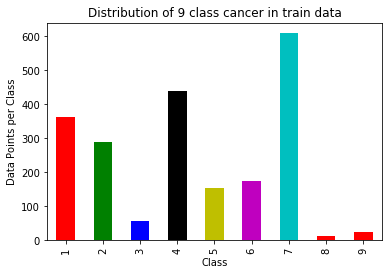

In [15]:
#returns the index of classes, '-' sign sorts the data in increasing order
print("------------------TRAIN DATA-------------------------")
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi :
    # total number of data per class divide by total number of datapoints in train data with only 2 decimals
    print (f'Number of data points in class {i+1} : {train_class_distribution.values[i]} ({np.round((train_class_distribution.values[i]/train_df.shape[0])*100 , 2)} %) ')
#lets do a distribution bar plot for train dataset
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data Points per Class')
plt.title('Distribution of 9 class cancer in train data')
print('-'*80)

------------------TEST DATA-------------------------
Number of data points in class 7 : 191 (28.72 %) 
Number of data points in class 4 : 137 (20.6 %) 
Number of data points in class 1 : 114 (17.14 %) 
Number of data points in class 2 : 91 (13.68 %) 
Number of data points in class 6 : 55 (8.27 %) 
Number of data points in class 5 : 48 (7.22 %) 
Number of data points in class 3 : 18 (2.71 %) 
Number of data points in class 9 : 7 (1.05 %) 
Number of data points in class 8 : 4 (0.6 %) 
--------------------------------------------------------------------------------


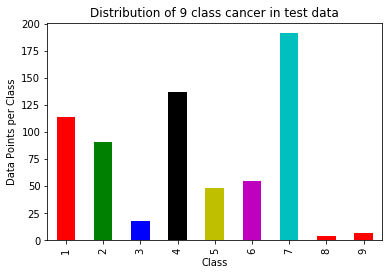

In [16]:
#returns the index of classes, '-' sign sorts the data in increasing order
print("------------------TEST DATA-------------------------")
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi :
    # total number of data per class divide by total number of datapoints in train data with only 2 decimals
    print (f'Number of data points in class {i+1} : {test_class_distribution.values[i]} ({np.round((test_class_distribution.values[i]/test_df.shape[0])*100 , 2)} %) ')
#lets do a distribution bar plot for train dataset
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
test_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data Points per Class')
plt.title('Distribution of 9 class cancer in test data')
print('-'*80)

------------------CV DATA-------------------------
Number of data points in class 7 : 153 (28.76 %) 
Number of data points in class 4 : 110 (20.68 %) 
Number of data points in class 1 : 91 (17.11 %) 
Number of data points in class 2 : 72 (13.53 %) 
Number of data points in class 6 : 44 (8.27 %) 
Number of data points in class 5 : 39 (7.33 %) 
Number of data points in class 3 : 14 (2.63 %) 
Number of data points in class 9 : 6 (1.13 %) 
Number of data points in class 8 : 3 (0.56 %) 
--------------------------------------------------------------------------------


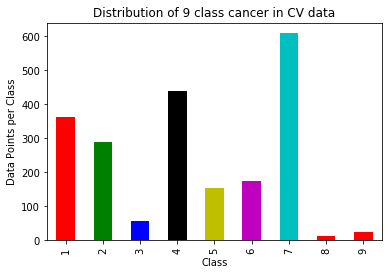

In [17]:
#returns the index of classes, '-' sign sorts the data in increasing order
print("------------------CV DATA-------------------------")
sorted_yi = np.argsort(-cv_class_distribution.values)
for i in sorted_yi :
    # total number of data per class divide by total number of datapoints in train data with only 2 decimals
    print (f'Number of data points in class {i+1} : {cv_class_distribution.values[i]} ({np.round((cv_class_distribution.values[i]/cv_df.shape[0])*100 , 2)} %) ')
#lets do a distribution bar plot for train dataset
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data Points per Class')
plt.title('Distribution of 9 class cancer in CV data')
print('-'*80)

# 5. EDA

##### Function to Plot Confusion Matrix

In [18]:
def plot_confusion_matrix(test_y, predict_y) :
    C = confusion_matrix(y_test, predicted_y)
    A =(((C.T)/(C.sum(axis=1))).T) #recall matrix
    B =(C/C.sum(axis=0)) #precision matrix
    # axis =1 means add along rows, axis =0 means add along columns

# representing precision recall confusion matrix in heatmap
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

# 5.1 Prediction using 'Random' Model

In a random model we generate random probabilities for all class such that probabilities of all class sum to 1.

first lets us give random values such that they sum to 1, then lets plot confusion, precision, recall matrix

Log Loss on Cross Validation Data Using Random Model :  2.5012397562271977
Log Loss on Test Validation Data Using Random Model :  2.471745661373517
-------------------- Confusion matrix --------------------


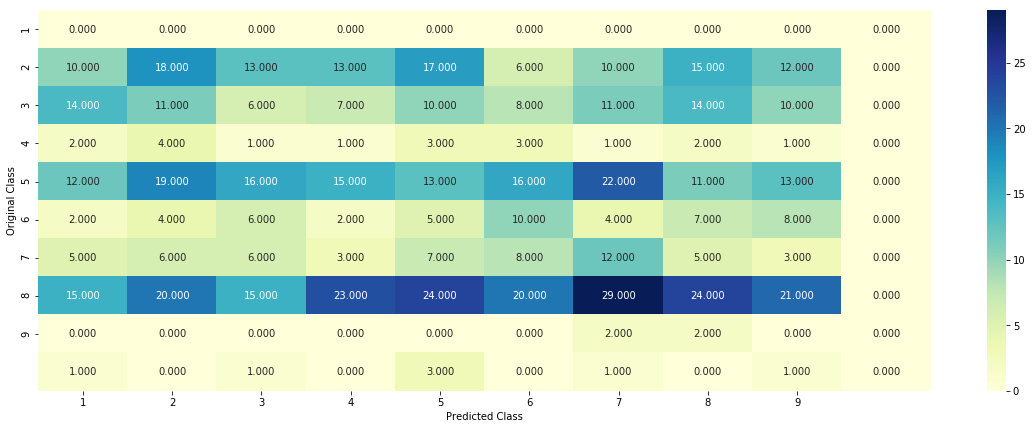

-------------------- Precision matrix (Columm Sum=1) --------------------


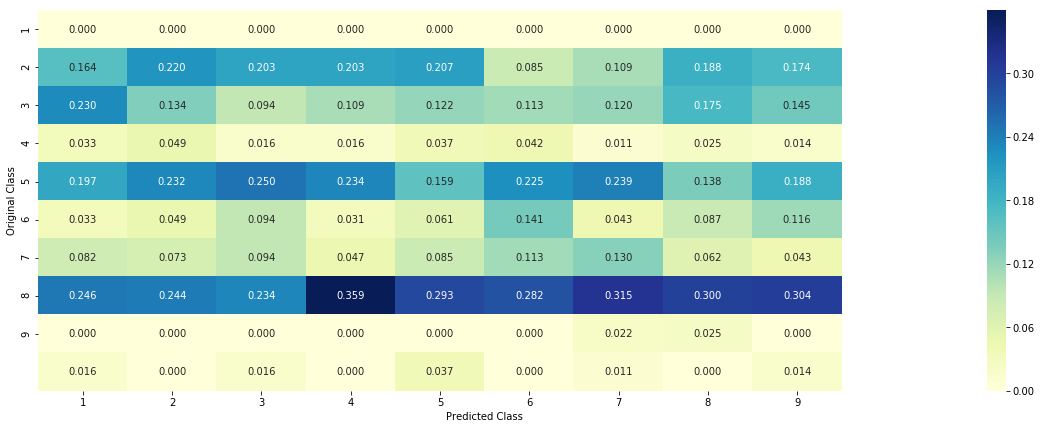

-------------------- Recall matrix (Row sum=1) --------------------


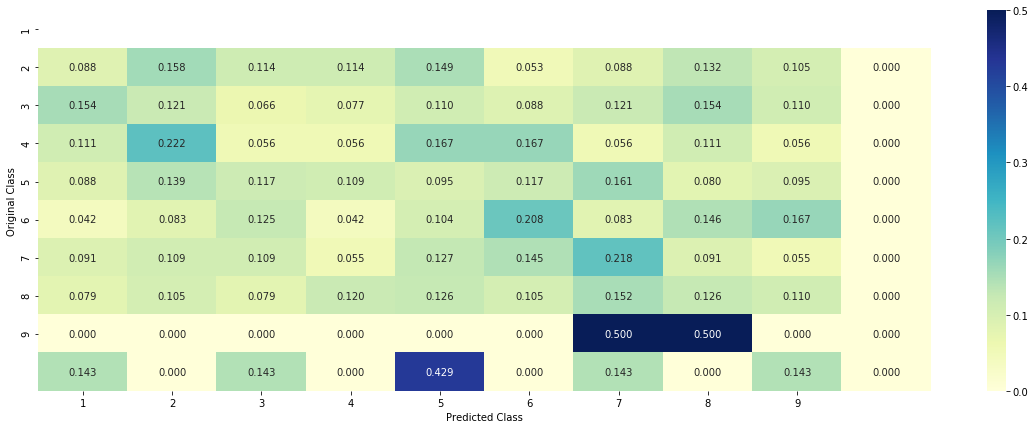

In [19]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039

#lets take number of datapoints in test and cv 
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]
# lets y_true = actual label and y_pred = label/class we are going to predict.
# lets create a y_pred output randomly for same size of test or cv data i.e for every datapoint one o/p

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len, 9)) #generate matrix with cv_data_len rows and 9 columns
for i in range (cv_data_len) :
    rand_probs = np.random.rand(1,9)# generate values for 1 row 9 columns
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print('Log Loss on Cross Validation Data Using Random Model : ' ,log_loss(y_cv, cv_predicted_y))

#test set error
# we create a output array that has exactly same size as the CV data
test_predicted_y = np.zeros((test_data_len, 9)) #generate matrix with cv_data_len rows and 9 columns
for i in range (test_data_len) :
    rand_probs = np.random.rand(1,9)# generate values for 1 row 9 columns
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print('Log Loss on Test Validation Data Using Random Model : ' ,log_loss(y_test, test_predicted_y))

predicted_y =np.argmax(test_predicted_y, axis=1)#returns the class which has highest probability
plot_confusion_matrix(y_test, predicted_y+1)

The log loss we got through random model is 2.5. so any proper machine learning model we build must have log loss less than this

# 5.2 Univariate Analysis

Now, we need to select features that are very important. we have 3 features gene, variation, text. 

to see which feature is important we build a model against single feature. if the log-loss is significantly lower than random model then we simply say that feature is important

### Featurizing the Gene and Varriation Datas

There are two ways to featurize a variable

1. One Hot Encoding
2. Response Coding

 - One hot Encoding: it is simillar to bag of words, where the word present is given value of 1 and rest all is zero.

 - Response Coding: it takes only the classes present into account and fills with mean value. Also known as mean value replacement.

   For a given gene it is converted to vector of number of classes using its probablistic values

   P(y=any class | gene) = # gene and any class/#genes [where any class = 1, 2,....,9]
   
<p> We will choose the appropriate featurization based on the ML model we use.  For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests. </p>


## 5.2.1 Univariate Analysis -Genes

In [20]:
unique_genes = train_df['Gene'].value_counts()
print(f'Number of unique Genes : {unique_genes.shape[0]}')
print(unique_genes.head(10))

Number of unique Genes : 232
BRCA1     179
TP53      102
EGFR       86
BRCA2      78
PTEN       71
KIT        65
BRAF       62
ERBB2      46
PDGFRA     42
ALK        37
Name: Gene, dtype: int64


# Questions :

1. Gene, What type of feature it is? = It is a Categorical Variable

2. How many categories are there and how they are distributed?

In [21]:
print("Ans: There are", unique_genes.shape[0] ,"different categories of genes in the train data, and they are distibuted as follows",)

Ans: There are 232 different categories of genes in the train data, and they are distibuted as follows


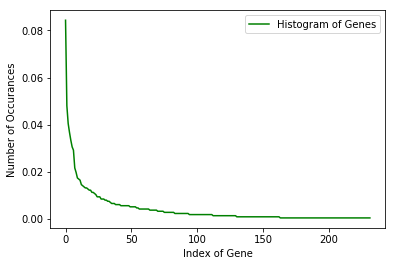

In [37]:
s = sum(unique_genes.values)
h = unique_genes.values/s
plt.plot(h, label='Histogram of Genes', color='g')
plt.xlabel('Index of Gene')
plt.ylabel('Number of Occurances')
plt.legend()

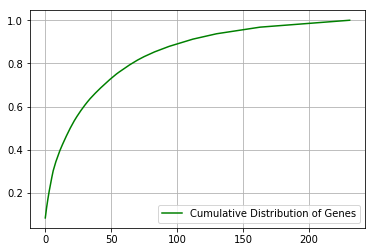

In [39]:
#CDF PLOT
c = np.cumsum(h)
plt.plot(c, label = 'Cumulative Distribution of Genes', color='g')
plt.legend()
plt.grid()

**Arround 100 Genes constitute for more than 85% of data**

# Response coding with Laplace smoothing
<ol>
 <li>alpha : used for laplace smoothing</li>
 <li>feature: ['gene', 'variation']</li>
 <li>df: ['train_df', 'test_df', 'cv_df']</li>
<ol> 
 <h2>Algorithm</h2>
    <ul>
 <li>Consider all unique values and the number of occurances of given   feature in train data dataframe</li>
 <li>build a vector (1*9) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha), Laplace smoothing is done to prevent Zero value</li>
 <li>gv_dict is like a look up table, for every gene it store a (1*9) representation of it</li>
 <li>for a value of feature in df:
 if it is in train data:
 we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'</li>
 <li>if it is not there is train:
 we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'</li>
 <li>return 'gv_fea'</li>
    </ul>

In [61]:
# get gene and vector in a dict
def get_gv_fea_dict(alpha, feature, df):
    value_count = train_df[feature].value_counts() #train_df['Gene'].value_counts()
    gv_dict=dict() #Gene Variation dict, which contains probability array for each gene/variation
    
    for i, denominator in value_count.items():
        vec = []
        for k in range(1,10):
            cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)]
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))
        gv_dict[i]=vec
    return gv_dict

def get_gv_feature(alpha, feature, df):
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    value_count = train_df[feature].value_counts()
    
    gv_fea = []# gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea
    

In [74]:
# response coding for gene feature
alpha = 1 #used for laplace smoothing
#gene feature train data
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, 'Gene', train_df))
#gene feature train data
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, 'Gene', test_df))
#gene feature train data
cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha, 'Gene', cv_df))

In [75]:
print("train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature:", train_gene_feature_responseCoding.shape)

train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature: (2124, 9)


### One-Hot Encoding

In [222]:
gene_vectorizer = TfidfVectorizer(max_features=1000)
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])

In [223]:
print("train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature:", train_gene_feature_onehotCoding.shape)

train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature: (2124, 231)


<h3> How good is gene feature in predicing class?</h3>

<p>There are many ways to estimate how good a feature is, in predicting y_i. One of the good methods is to build a proper ML model using just this feature. In this case, we will build a logistic regression model using only Gene feature (one hot encoded) to predict y_i.</p>

For values of alpha =  1e-05 The log loss is: 1.4088743860301245
For values of alpha =  0.0001 The log loss is: 1.1599579624185883
For values of alpha =  0.001 The log loss is: 1.1612254321862432
For values of alpha =  0.01 The log loss is: 1.2843283218189545
For values of alpha =  0.1 The log loss is: 1.4391259758458939
For values of alpha =  1 The log loss is: 1.486588779004682


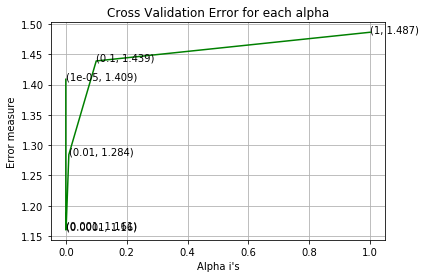

For values of best alpha =  0.0001 The train log loss is: 1.0801787814796378
For values of best alpha =  0.0001 The cross validation log loss is: 1.1599579624185883
For values of best alpha =  0.0001 The test log loss is: 1.1970409503499382


In [224]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_gene_feature_onehotCoding, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_gene_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_gene_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_gene_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p> <b>Q5.</b> Is the Gene feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p> <b>Ans.</b> Yes, it is. Otherwise, the CV and Test errors would be significantly more than train error. </p>

In [225]:
print("Q6. How many data points in Test and CV datasets are covered by the ", unique_genes.shape[0], " genes in train dataset?")

test_coverage=test_df[test_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]
cv_coverage=cv_df[cv_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]

print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q6. How many data points in Test and CV datasets are covered by the  232  genes in train dataset?
Ans
1. In test data 647 out of 665 : 97.29323308270676
2. In cross validation data 511 out of  532 : 96.05263157894737


## 5.2.2 Univariate Analysis on Variation Feature

In [226]:
unique_variations = train_df['Variation'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
print(unique_variations.head(10))

Number of Unique Variations : 1918
Truncating_Mutations    62
Deletion                54
Amplification           48
Fusions                 20
Overexpression           5
E17K                     3
T167A                    2
S222D                    2
E542K                    2
M1R                      2
Name: Variation, dtype: int64


<h6> How many categories are present in Variation Train Data? </h6>

In [227]:
print("Ans: There are", unique_variations.shape[0] ,"different categories of variations in the train data, and they are distibuted as follows",)

Ans: There are 1918 different categories of variations in the train data, and they are distibuted as follows


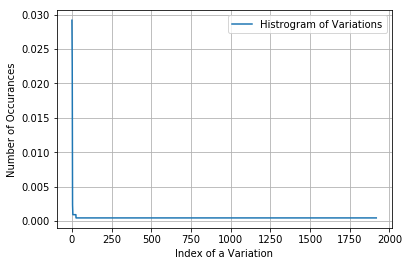

In [228]:
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

[0.02919021 0.05461394 0.07721281 ... 0.99905838 0.99952919 1.        ]


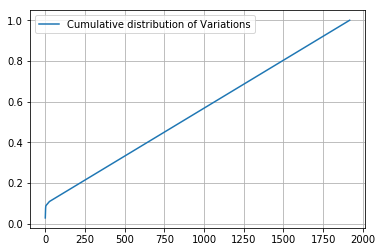

In [229]:
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

In [230]:
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", train_df))
# test gene feature
test_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", test_df))
# cross validation gene feature
cv_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", cv_df))

In [231]:
print("train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature:", train_variation_feature_responseCoding.shape)

train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature: (2124, 9)


In [232]:
# one-hot encoding of variation feature.
variation_vectorizer = TfidfVectorizer(max_features=1000)
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])

In [233]:
print("train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature:", train_variation_feature_onehotCoding.shape)

train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature: (2124, 1000)


<p style="font-size:18px;"> <b>Q10.</b> How good is this Variation feature  in predicting classes</p>

For values of alpha =  1e-05 The log loss is: 1.7231259900035238
For values of alpha =  0.0001 The log loss is: 1.7067173675557166
For values of alpha =  0.001 The log loss is: 1.7046540637976413
For values of alpha =  0.01 The log loss is: 1.7105108139520868
For values of alpha =  0.1 The log loss is: 1.7172256893273443
For values of alpha =  1 The log loss is: 1.7179603384285944


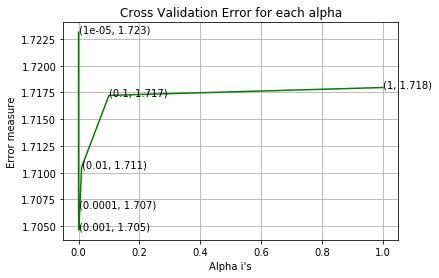

For values of best alpha =  0.001 The train log loss is: 1.383961581409711
For values of best alpha =  0.001 The cross validation log loss is: 1.7046540637976413
For values of best alpha =  0.001 The test log loss is: 1.7318339432640957


In [234]:
alpha = [10 ** x for x in range(-5, 1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_variation_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_variation_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_variation_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_variation_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q11.</b> Is the Variation feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Not sure! But lets be very sure using the below analysis. </p>

In [235]:
print("Q12. How many data points are covered by total ", unique_variations.shape[0], " genes in test and cross validation data sets?")
test_coverage=test_df[test_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
cv_coverage=cv_df[cv_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q12. How many data points are covered by total  1918  genes in test and cross validation data sets?
Ans
1. In test data 55 out of 665 : 8.270676691729323
2. In cross validation data 61 out of  532 : 11.466165413533833


## 5.2.3 Univariate Analysis on Text Feature

1. How many unique words are present in train data?
2. How are word frequencies distributed?
3. How to featurize text field?
4. Is the text feature useful in predicitng y_i?
5. Is the text feature stable across train, test and CV datasets?

In [236]:
def extract_dictionary_paddle(cls_text):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['TEXT'].split():
            dictionary[word] +=1
    return dictionary

In [237]:
import math
#https://stackoverflow.com/a/1602964
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))
            row_index += 1
    return text_feature_responseCoding

In [238]:
# building a TfidfVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = TfidfVectorizer(min_df=3, max_features=1000)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 1000


In [239]:
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text = train_df[train_df['Class']==i]
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    # append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(train_df)


confuse_array = []
for i in train_text_features:
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)

In [240]:
#response coding of text features
train_text_feature_responseCoding  = get_text_responsecoding(train_df)
test_text_feature_responseCoding  = get_text_responsecoding(test_df)
cv_text_feature_responseCoding  = get_text_responsecoding(cv_df)

In [241]:
# https://stackoverflow.com/a/16202486
# we convert each row values such that they sum to 1  
train_text_feature_responseCoding = (train_text_feature_responseCoding.T/train_text_feature_responseCoding.sum(axis=1)).T
test_text_feature_responseCoding = (test_text_feature_responseCoding.T/test_text_feature_responseCoding.sum(axis=1)).T
cv_text_feature_responseCoding = (cv_text_feature_responseCoding.T/cv_text_feature_responseCoding.sum(axis=1)).T

In [242]:
# don't forget to normalize every feature
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
# don't forget to normalize every feature
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
# don't forget to normalize every feature
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

In [243]:
#https://stackoverflow.com/a/2258273/4084039
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

In [244]:
# Number of words for a given frequency.
print(Counter(sorted_text_occur))

Counter({250.56980204050794: 1, 178.54445747401738: 1, 142.26705553491178: 1, 131.6422036267695: 1, 126.84852779368074: 1, 115.36366266203741: 1, 115.07791070183734: 1, 113.96409022974935: 1, 109.3787100572056: 1, 107.98489408732576: 1, 104.88733404631182: 1, 89.59053396279653: 1, 88.39397703938889: 1, 82.41702676883631: 1, 80.90283440241038: 1, 79.31831317150348: 1, 78.53500425892675: 1, 77.49395612187753: 1, 76.5339487002397: 1, 75.23232766970902: 1, 74.6932221910574: 1, 72.51688676760354: 1, 71.22344462555603: 1, 70.99740543486028: 1, 67.97877375146577: 1, 67.30976770417274: 1, 66.62391168804099: 1, 65.78191529900529: 1, 63.33791900575911: 1, 63.25501175146699: 1, 63.14346615059386: 1, 62.90912458152092: 1, 62.65288542877728: 1, 58.31443560910782: 1, 57.52984637232967: 1, 56.38976624271087: 1, 56.11986328735009: 1, 54.98939650901846: 1, 54.18695161961185: 1, 51.51854445573569: 1, 50.70215179791717: 1, 50.3321164411436: 1, 49.36826099197517: 1, 49.18145540096903: 1, 47.75575348832779

For values of alpha =  1e-05 The log loss is: 1.1555699671223245
For values of alpha =  0.0001 The log loss is: 1.1050650610976882
For values of alpha =  0.001 The log loss is: 1.4329949854837891
For values of alpha =  0.01 The log loss is: 2.0196062146549885
For values of alpha =  0.1 The log loss is: 2.121468412312722
For values of alpha =  1 The log loss is: 2.100606127689849


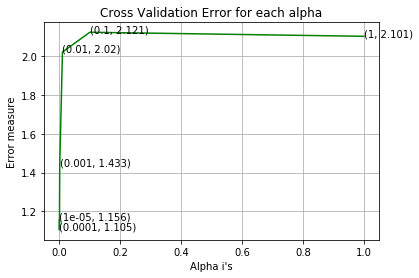

For values of best alpha =  0.0001 The train log loss is: 0.8387485730271036
For values of best alpha =  0.0001 The cross validation log loss is: 1.1050650610976882
For values of best alpha =  0.0001 The test log loss is: 1.1708288578571584


In [245]:
# Train a Logistic regression+Calibration model using text features which are on-hot encoded
alpha = [10 ** x for x in range(-5, 1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q.</b> Is the Text feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it seems like! </p>

In [246]:
def get_intersec_text(df):
    df_text_vec = TfidfVectorizer(min_df=3, max_features=1000)
    df_text_fea = df_text_vec.fit_transform(df['TEXT'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features))
    return len1,len2

In [247]:
len1,len2 = get_intersec_text(test_df)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")
len1,len2 = get_intersec_text(cv_df)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

94.8 % of word of test data appeared in train data
94.7 % of word of Cross Validation appeared in train data


# 6. Machine Learning Models

##### Lets use all the models with tf-idf features and use top 1000 features

In [248]:
#Data preparation for ML models.

#Misc. functionns for ML models


def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [249]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [250]:
# this function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = TfidfVectorizer(max_features=1000)
    var_count_vec = TfidfVectorizer(max_features=1000)
    text_count_vec = TfidfVectorizer(min_df=3, max_features=1000)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

In [251]:
# merging gene, variance and text features

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))


train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding))
test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding))
cv_gene_var_responseCoding = np.hstack((cv_gene_feature_responseCoding,cv_variation_feature_responseCoding))

train_x_responseCoding = np.hstack((train_gene_var_responseCoding, train_text_feature_responseCoding))
test_x_responseCoding = np.hstack((test_gene_var_responseCoding, test_text_feature_responseCoding))
cv_x_responseCoding = np.hstack((cv_gene_var_responseCoding, cv_text_feature_responseCoding))


In [252]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 2231)
(number of data points * number of features) in test data =  (665, 2231)
(number of data points * number of features) in cross validation data = (532, 2231)


In [253]:
print(" Response encoding features :")
print("(number of data points * number of features) in train data = ", train_x_responseCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_responseCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_responseCoding.shape)

 Response encoding features :
(number of data points * number of features) in train data =  (2124, 27)
(number of data points * number of features) in test data =  (665, 27)
(number of data points * number of features) in cross validation data = (532, 27)


## Base Line Model

# 6.1 Naive Bayes 

##### Hyper Parameter Tuning

for alpha = 1e-05
Log Loss : 1.1015014915022643
for alpha = 0.0001
Log Loss : 1.1002277283855806
for alpha = 0.001
Log Loss : 1.097699855544837
for alpha = 0.1
Log Loss : 1.0909634878410837
for alpha = 1
Log Loss : 1.2000850646937486
for alpha = 10
Log Loss : 1.3716422227010963
for alpha = 100
Log Loss : 1.3708947216803833
for alpha = 1000
Log Loss : 1.3674404032647458


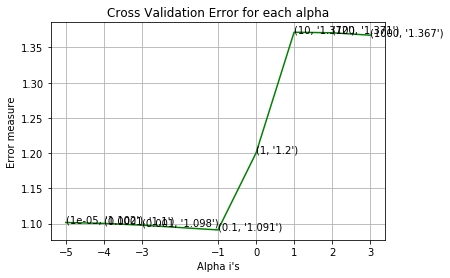

For values of best alpha =  0.1 The train log loss is: 0.8210352024873983
For values of best alpha =  0.1 The cross validation log loss is: 1.0909634878410837
For values of best alpha =  0.1 The test log loss is: 1.150119300086469


In [254]:
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)


predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


##### Testing the model with best Hyper Parameters

Log Loss : 1.0909634878410837
Number of missclassified point : 0.33458646616541354
-------------------- Confusion matrix --------------------


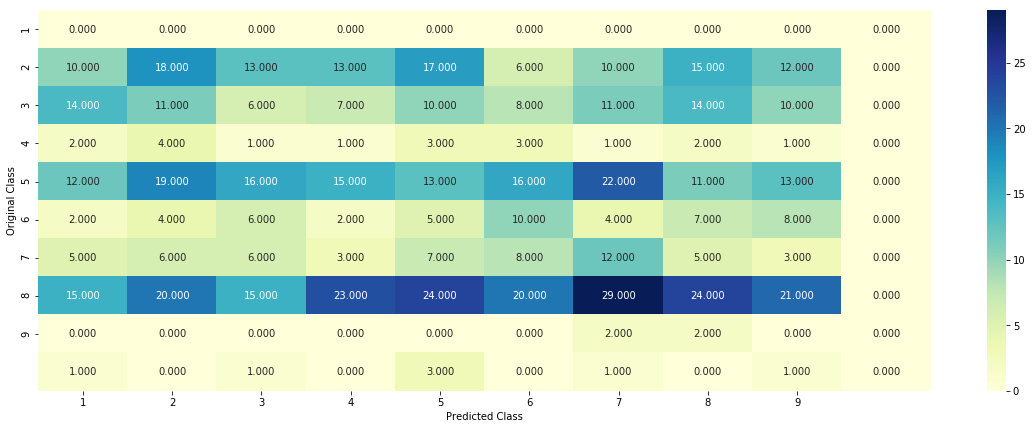

-------------------- Precision matrix (Columm Sum=1) --------------------


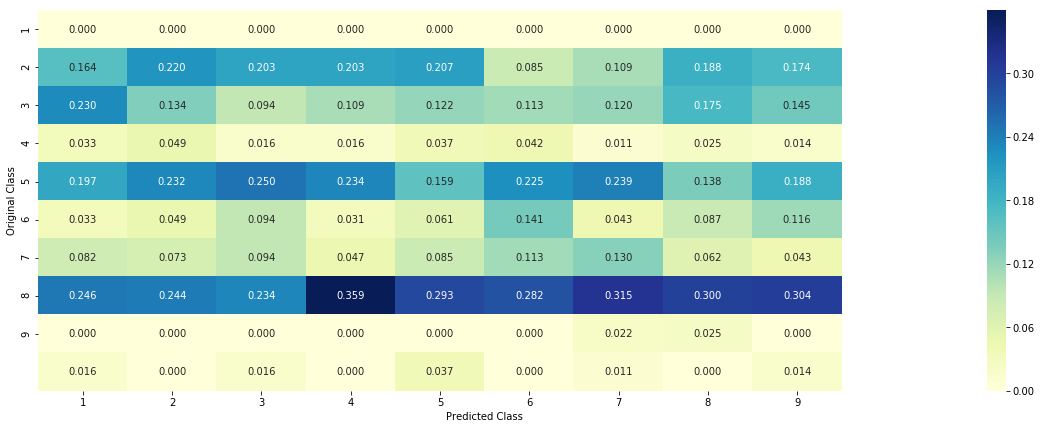

-------------------- Recall matrix (Row sum=1) --------------------


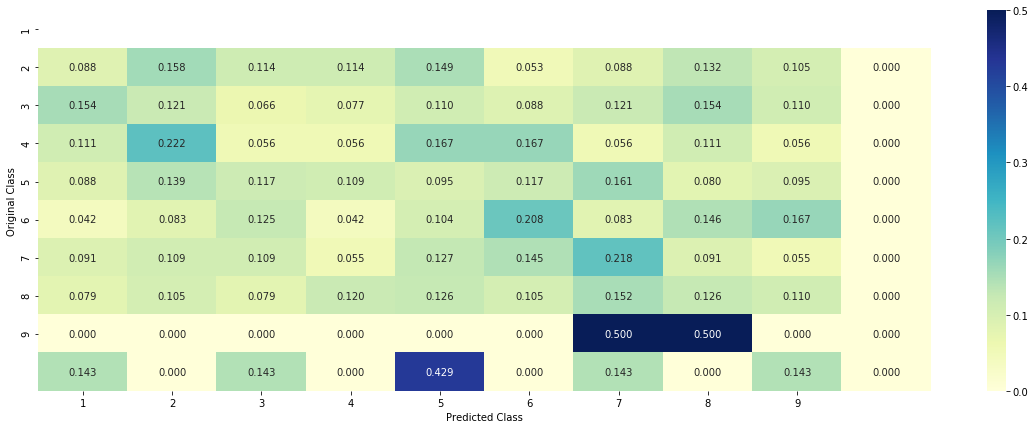

In [255]:
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_onehotCoding)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_onehotCoding.toarray()))

### Feature Importance

##### Correctly Classified Points

In [256]:
test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[0.0434 0.0448 0.0159 0.0515 0.0344 0.7519 0.0504 0.0047 0.0029]]
Actual Class : 6
--------------------------------------------------
5 Text feature [brca] present in test data point [True]
6 Text feature [odds] present in test data point [True]
8 Text feature [deleterious] present in test data point [True]
9 Text feature [57] present in test data point [True]
10 Text feature [classified] present in test data point [True]
11 Text feature [basis] present in test data point [True]
12 Text feature [history] present in test data point [True]
14 Text feature [combined] present in test data point [True]
15 Text feature [models] present in test data point [True]
16 Text feature [predicted] present in test data point [True]
17 Text feature [expected] present in test data point [True]
18 Text feature [brca1] present in test data point [True]
19 Text feature [43] present in test data point [True]
20 Text feature [family] present in test data po

#### Incorrectly classified points

In [257]:
test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 2
Predicted Class Probabilities: [[0.0779 0.6063 0.0196 0.0662 0.0424 0.0396 0.1386 0.0059 0.0034]]
Actual Class : 1
--------------------------------------------------
12 Text feature [patients] present in test data point [True]
13 Text feature [treatment] present in test data point [True]
14 Text feature [clinical] present in test data point [True]
15 Text feature [response] present in test data point [True]
16 Text feature [therapy] present in test data point [True]
21 Text feature [months] present in test data point [True]
22 Text feature [11] present in test data point [True]
23 Text feature [study] present in test data point [True]
24 Text feature [13] present in test data point [True]
25 Text feature [12] present in test data point [True]
26 Text feature [18] present in test data point [True]
27 Text feature [progression] present in test data point [True]
28 Text feature [different] present in test data point [True]
29 Text feature [first] present in test data p

# 6.2 K-NN

### Hyper parameter tuning

for alpha = 5
Log Loss : 0.9886967043886943
for alpha = 11
Log Loss : 0.9443387205805103
for alpha = 15
Log Loss : 0.9420066785742648
for alpha = 21
Log Loss : 0.9435326853770966
for alpha = 31
Log Loss : 0.9621077249955117
for alpha = 41
Log Loss : 0.9666145525069149
for alpha = 51
Log Loss : 0.9623198723676617
for alpha = 99
Log Loss : 1.001465762149773


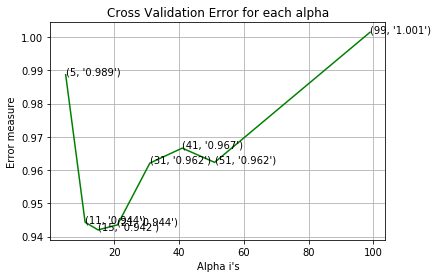

For values of best alpha =  15 The train log loss is: 0.7123037364933945
For values of best alpha =  15 The cross validation log loss is: 0.9420066785742648
For values of best alpha =  15 The test log loss is: 1.0408485814278892


In [258]:
alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_responseCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


## Test Model with best Hyper Parameter

Log loss : 0.9420066785742648
Number of mis-classified points : 0.33270676691729323
-------------------- Confusion matrix --------------------


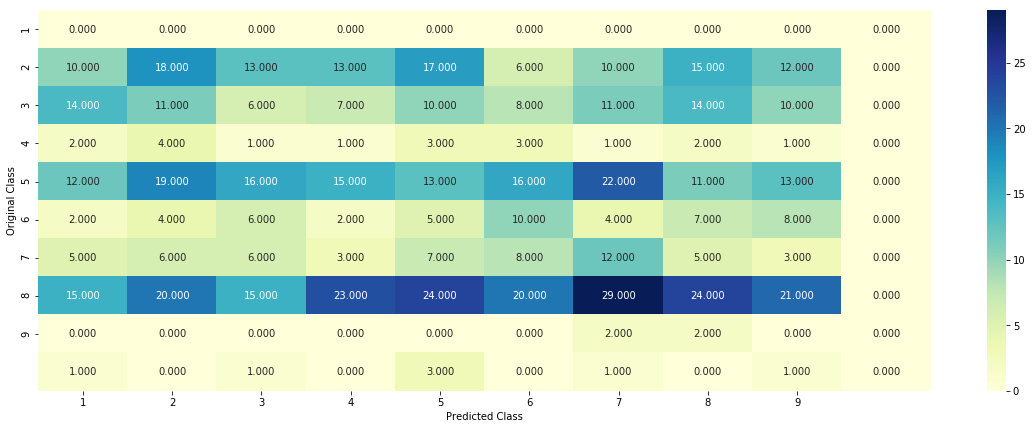

-------------------- Precision matrix (Columm Sum=1) --------------------


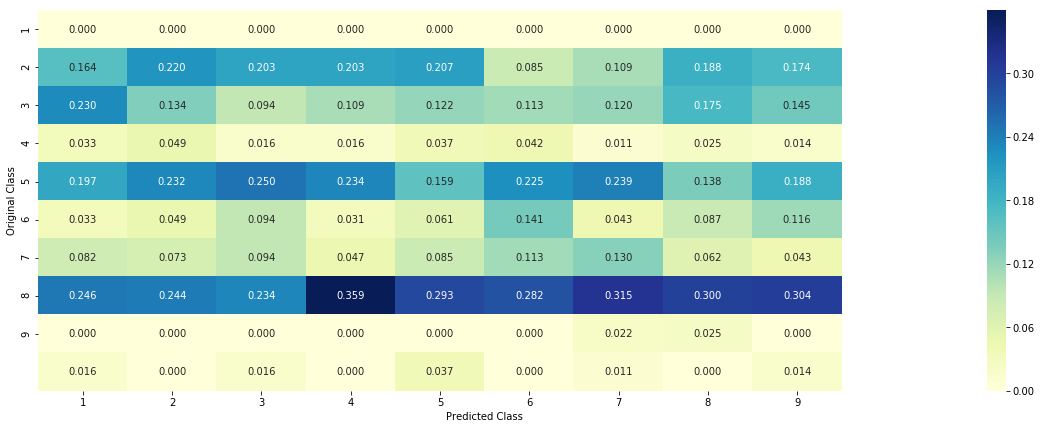

-------------------- Recall matrix (Row sum=1) --------------------


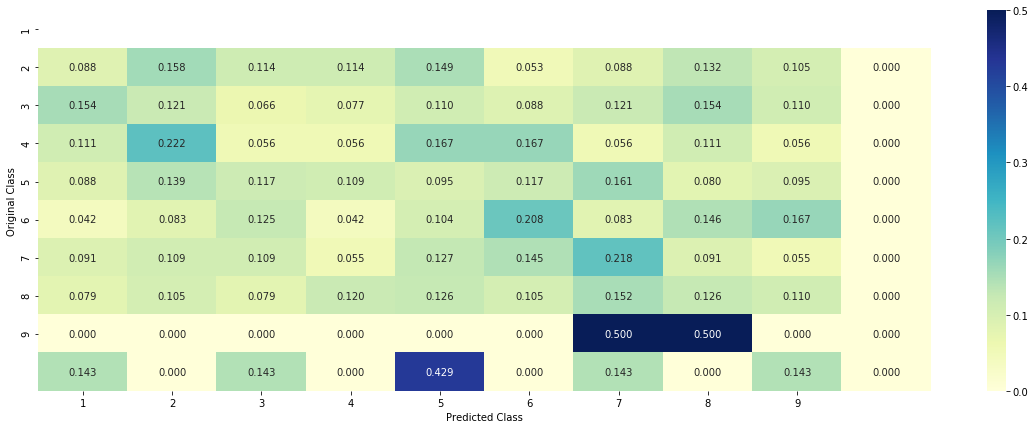

In [259]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y, cv_x_responseCoding, cv_y, clf)

#### sample query point - 1

In [260]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 1
predicted_cls = sig_clf.predict(test_x_responseCoding[0].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("The ",alpha[best_alpha]," nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 2
Actual Class : 1
The  15  nearest neighbours of the test points belongs to classes [6 1 1 1 1 1 1 1 1 1 2 1 1 1 1]
Fequency of nearest points : Counter({1: 13, 6: 1, 2: 1})


#### sample query point - 2

In [261]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 100

predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("the k value for knn is",alpha[best_alpha],"and the nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 6
Actual Class : 6
the k value for knn is 15 and the nearest neighbours of the test points belongs to classes [6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
Fequency of nearest points : Counter({6: 15})


# 6.3 Logistic Regression with Class Balanced

#### Hyper Parameter Tuning

for alpha = 1e-06
Log Loss : 1.150336556586646
for alpha = 1e-05
Log Loss : 1.07488833481432
for alpha = 0.0001
Log Loss : 0.9264965329795839
for alpha = 0.001
Log Loss : 0.938119131695029
for alpha = 0.01
Log Loss : 1.1263691311745232
for alpha = 0.1
Log Loss : 1.684291508336966
for alpha = 1
Log Loss : 1.8468337918048616
for alpha = 10
Log Loss : 1.8632061996197735
for alpha = 100
Log Loss : 1.8650147070868763


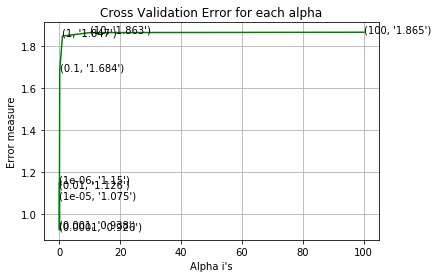

For values of best alpha =  0.0001 The train log loss is: 0.6108700233781955
For values of best alpha =  0.0001 The cross validation log loss is: 0.9264965329795839
For values of best alpha =  0.0001 The test log loss is: 1.0096660488844744


In [262]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

#### Testing Model with Best Hyper Parameters

Log loss : 0.9264965329795839
Number of mis-classified points : 0.3233082706766917
-------------------- Confusion matrix --------------------


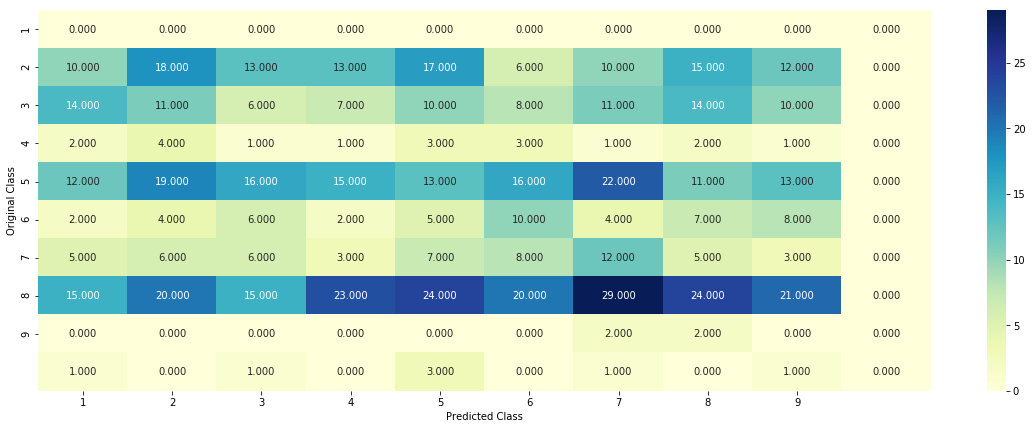

-------------------- Precision matrix (Columm Sum=1) --------------------


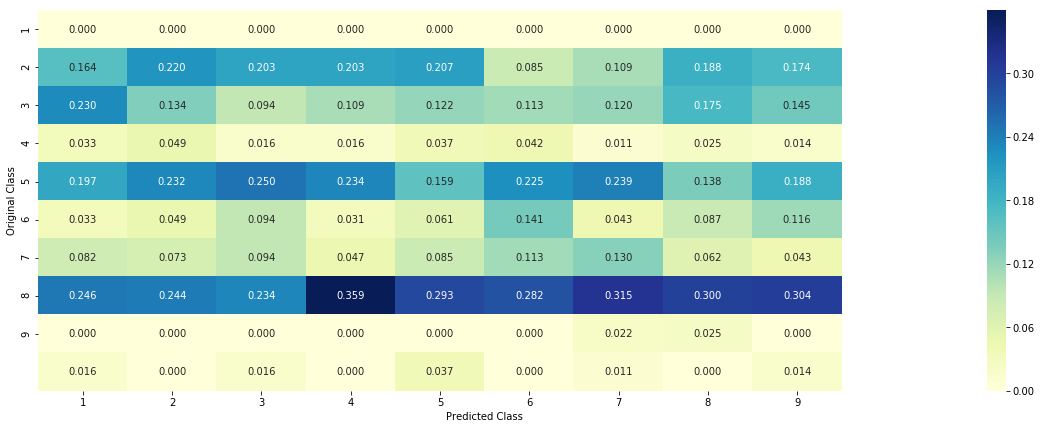

-------------------- Recall matrix (Row sum=1) --------------------


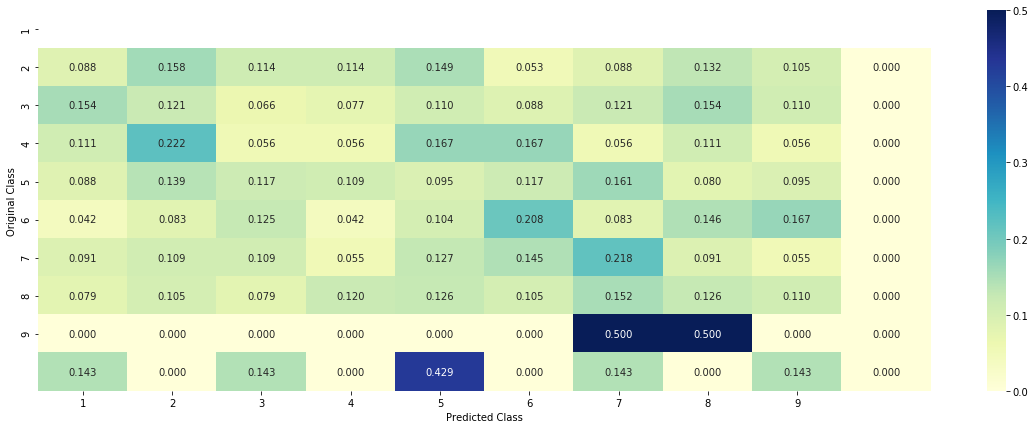

In [263]:
# class_weight = 'balanced' makes the datapoints equal on all classes
#SGDClassifier with loss='log' is logistic regression.
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

#### Feature Importance

In [264]:
def get_imp_feature_names(text, indices, removed_ind = []):
    word_present = 0
    tabulte_list = []
    incresingorder_ind = 0
    for i in indices:
        if i < train_gene_feature_onehotCoding.shape[1]:
            tabulte_list.append([incresingorder_ind, "Gene", "Yes"])
        elif i< 18:
            tabulte_list.append([incresingorder_ind,"Variation", "Yes"])
        if ((i > 17) & (i not in removed_ind)) :
            word = train_text_features[i]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
            tabulte_list.append([incresingorder_ind,train_text_features[i], yes_no])
        incresingorder_ind += 1
    print(word_present, "most importent features are present in our query point")
    print("-"*50)
    print("The features that are most importent of the ",predicted_cls[0]," class:")
    print (tabulate(tabulte_list, headers=["Index",'Feature name', 'Present or Not']))

#### Correctly Classified Point

In [265]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 50
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[8.014e-01 1.564e-01 1.300e-03 2.400e-03 6.300e-03 4.600e-03 2.630e-02
  1.100e-03 2.000e-04]]
Actual Class : 1
--------------------------------------------------
17 Text feature [hotspots] present in test data point [True]
29 Text feature [panel] present in test data point [True]
Out of the top  50  features  2 are present in query point


#### Incorrectly Classified Point

In [266]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[1.410e-02 8.700e-03 4.200e-03 8.900e-03 7.260e-02 8.894e-01 1.200e-03
  9.000e-04 1.000e-04]]
Actual Class : 6
--------------------------------------------------
8 Text feature [values] present in test data point [True]
48 Text feature [dose] present in test data point [True]
50 Text feature [ligase] present in test data point [True]
58 Text feature [substitutions] present in test data point [True]
64 Text feature [brca] present in test data point [True]
67 Text feature [ring] present in test data point [True]
77 Text feature [ovarian] present in test data point [True]
78 Text feature [72] present in test data point [True]
80 Text feature [significant] present in test data point [True]
88 Text feature [basis] present in test data point [True]
89 Text feature [000] present in test data point [True]
92 Text feature [free] present in test data point [True]
96 Text feature [showing] present in test data point [True]
102 Text feature [con

460 Text feature [alleles] present in test data point [True]
461 Text feature [protein] present in test data point [True]
467 Text feature [15] present in test data point [True]
470 Text feature [set] present in test data point [True]
471 Text feature [altered] present in test data point [True]
472 Text feature [54] present in test data point [True]
478 Text feature [part] present in test data point [True]
479 Text feature [interestingly] present in test data point [True]
481 Text feature [factors] present in test data point [True]
482 Text feature [since] present in test data point [True]
483 Text feature [function] present in test data point [True]
485 Text feature [normal] present in test data point [True]
486 Text feature [study] present in test data point [True]
488 Text feature [cannot] present in test data point [True]
496 Text feature [unknown] present in test data point [True]
Out of the top  500  features  188 are present in query point


## 6.3.1 Logistic Regression Without Class Balancing

#### Hyper parameter tuning

for alpha = 1e-06
Log Loss : 1.1759093076566678
for alpha = 1e-05
Log Loss : 1.1158764327259525
for alpha = 0.0001
Log Loss : 0.9799945781037582
for alpha = 0.001
Log Loss : 1.0148055407537941
for alpha = 0.01
Log Loss : 1.2860484892354163
for alpha = 0.1
Log Loss : 1.6881886350715163
for alpha = 1
Log Loss : 1.8203814290184908


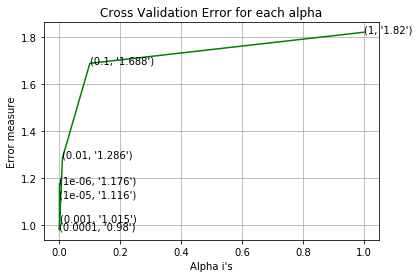

For values of best alpha =  0.0001 The train log loss is: 0.5970146065803627
For values of best alpha =  0.0001 The cross validation log loss is: 0.9799945781037582
For values of best alpha =  0.0001 The test log loss is: 1.0423616176921933


In [267]:
alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

#### Testing Models with best hyper parameter

Log loss : 0.9799945781037582
Number of mis-classified points : 0.32706766917293234
-------------------- Confusion matrix --------------------


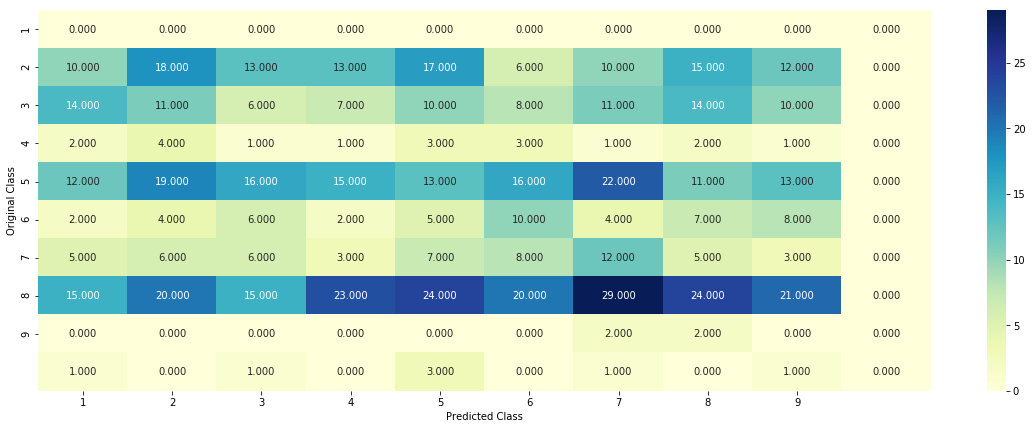

-------------------- Precision matrix (Columm Sum=1) --------------------


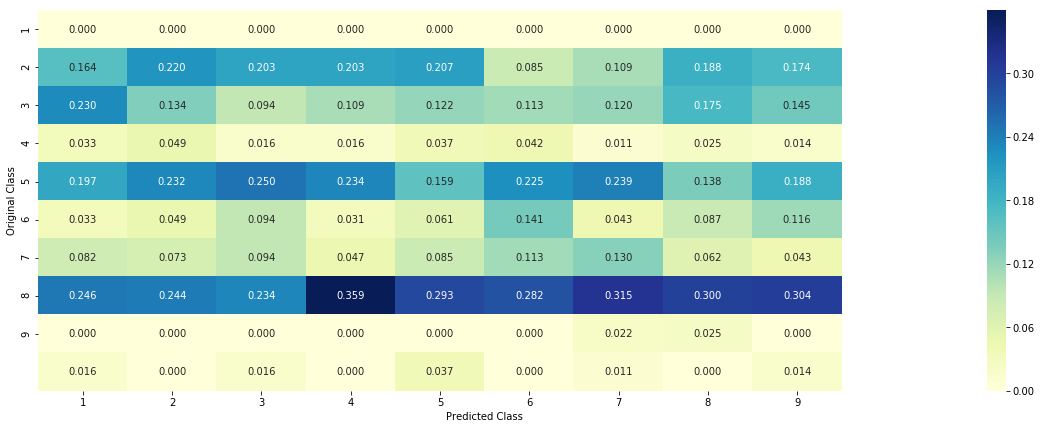

-------------------- Recall matrix (Row sum=1) --------------------


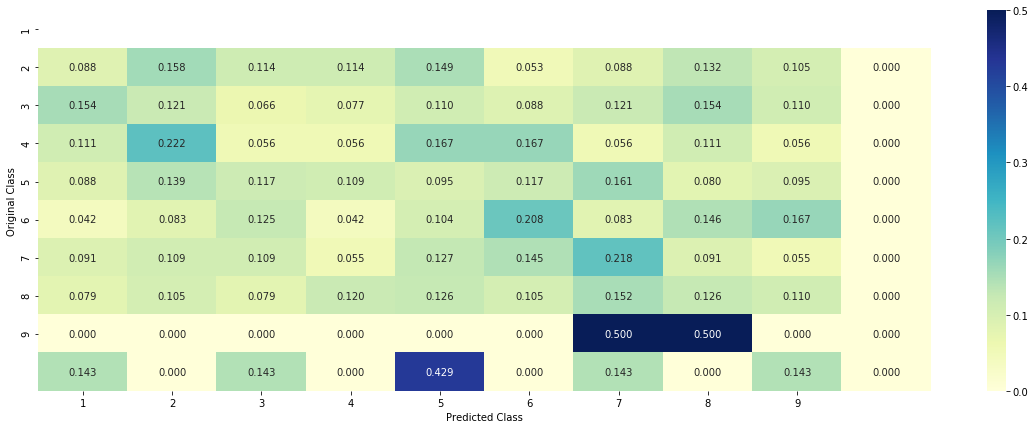

In [268]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

#### Correctly Classified Point

In [269]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[7.819e-01 1.690e-01 7.000e-04 2.400e-03 4.800e-03 4.000e-03 3.630e-02
  9.000e-04 0.000e+00]]
Actual Class : 1
--------------------------------------------------
17 Text feature [hotspots] present in test data point [True]
21 Text feature [panel] present in test data point [True]
43 Text feature [hydrophobic] present in test data point [True]
65 Text feature [therefore] present in test data point [True]
68 Text feature [page] present in test data point [True]
79 Text feature [brain] present in test data point [True]
87 Text feature [corresponding] present in test data point [True]
94 Text feature [screening] present in test data point [True]
123 Text feature [next] present in test data point [True]
131 Text feature [defined] present in test data point [True]
143 Text feature [structure] present in test data point [True]
146 Text feature [position] present in test data point [True]
155 Text feature [encoding] present in test data poin

471 Text feature [vivo] present in test data point [True]
472 Text feature [yet] present in test data point [True]
473 Text feature [residues] present in test data point [True]
474 Text feature [induction] present in test data point [True]
475 Text feature [established] present in test data point [True]
476 Text feature [least] present in test data point [True]
477 Text feature [activities] present in test data point [True]
478 Text feature [form] present in test data point [True]
479 Text feature [representative] present in test data point [True]
482 Text feature [affected] present in test data point [True]
484 Text feature [performed] present in test data point [True]
485 Text feature [view] present in test data point [True]
488 Text feature [multiple] present in test data point [True]
489 Text feature [insertion] present in test data point [True]
490 Text feature [added] present in test data point [True]
491 Text feature [mean] present in test data point [True]
493 Text feature [cou

#### Incorrectly Classified Point

In [270]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[1.590e-02 9.500e-03 5.000e-04 1.320e-02 6.670e-02 8.916e-01 2.300e-03
  3.000e-04 0.000e+00]]
Actual Class : 6
--------------------------------------------------
10 Text feature [values] present in test data point [True]
41 Text feature [ligase] present in test data point [True]
49 Text feature [dose] present in test data point [True]
57 Text feature [substitutions] present in test data point [True]
65 Text feature [brca] present in test data point [True]
69 Text feature [ring] present in test data point [True]
77 Text feature [ovarian] present in test data point [True]
82 Text feature [significant] present in test data point [True]
83 Text feature [72] present in test data point [True]
87 Text feature [basis] present in test data point [True]
91 Text feature [showing] present in test data point [True]
94 Text feature [free] present in test data point [True]
97 Text feature [000] present in test data point [True]
102 Text feature [ex

457 Text feature [disease] present in test data point [True]
458 Text feature [activity] present in test data point [True]
464 Text feature [95] present in test data point [True]
466 Text feature [15] present in test data point [True]
467 Text feature [length] present in test data point [True]
470 Text feature [normal] present in test data point [True]
476 Text feature [alleles] present in test data point [True]
Out of the top  500  features  181 are present in query point


# 6.4 Linear SVM

#### Hyper parameter Tuning

for C = 1e-05
Log Loss : 1.084339357779178
for C = 0.0001
Log Loss : 1.0536672090150212
for C = 0.001
Log Loss : 1.0594283339595674
for C = 0.01
Log Loss : 1.3531432616771288
for C = 0.1
Log Loss : 1.7201861297151817
for C = 1
Log Loss : 1.8654044614664314
for C = 10
Log Loss : 1.8654040427929466
for C = 100
Log Loss : 1.8654040675245813


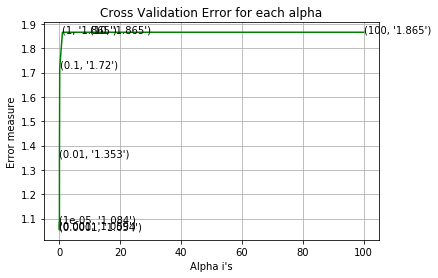

For values of best alpha =  0.0001 The train log loss is: 0.6861454521731158
For values of best alpha =  0.0001 The cross validation log loss is: 1.0536672090150212
For values of best alpha =  0.0001 The test log loss is: 1.0932270082206519


In [271]:
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

#### Testing with best Hyper parameter

Log loss : 1.0536672090150212
Number of mis-classified points : 0.36466165413533835
-------------------- Confusion matrix --------------------


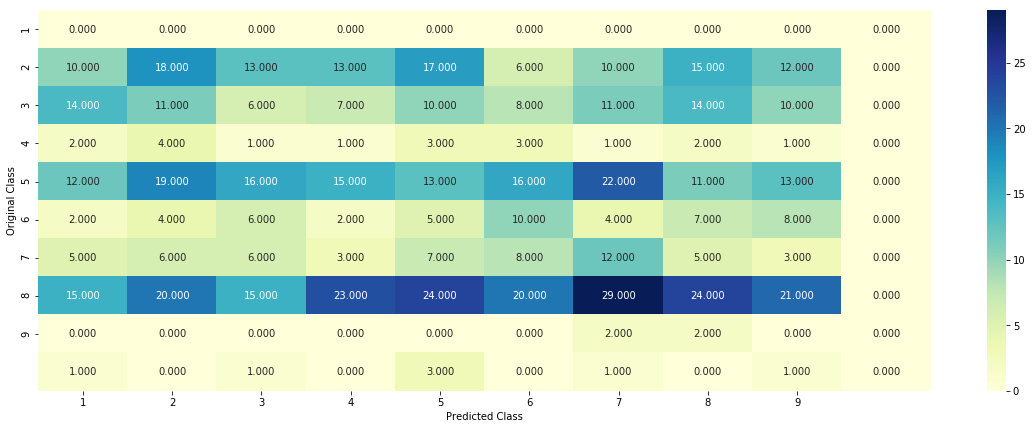

-------------------- Precision matrix (Columm Sum=1) --------------------


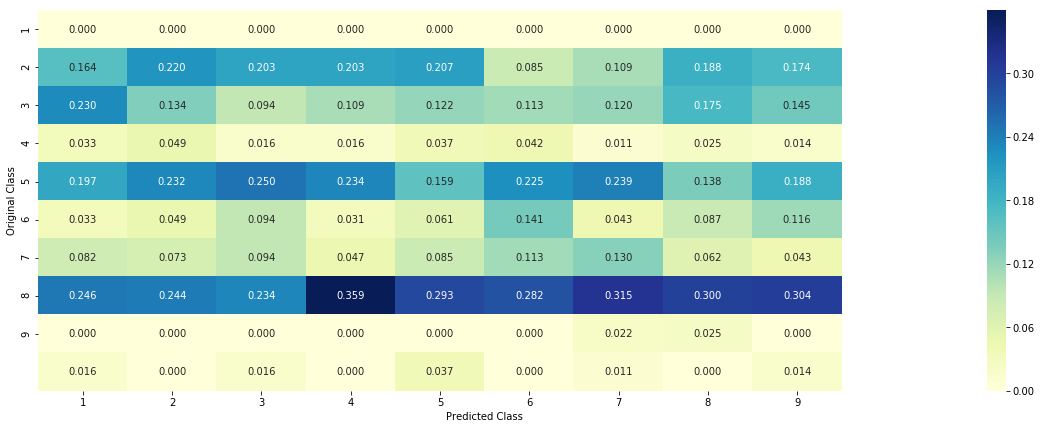

-------------------- Recall matrix (Row sum=1) --------------------


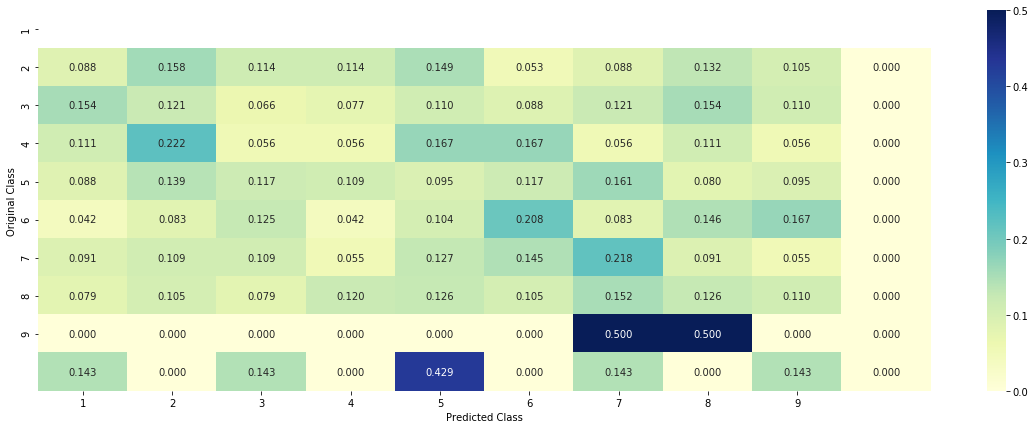

In [272]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

### Feature Importance

#### For Correctly Classified point

In [273]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
# test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[7.393e-01 1.660e-01 1.600e-03 1.400e-03 8.300e-03 4.700e-03 7.760e-02
  9.000e-04 3.000e-04]]
Actual Class : 1
--------------------------------------------------
57 Text feature [panel] present in test data point [True]
58 Text feature [screening] present in test data point [True]
59 Text feature [hotspots] present in test data point [True]
63 Text feature [therefore] present in test data point [True]
65 Text feature [cultured] present in test data point [True]
66 Text feature [brain] present in test data point [True]
67 Text feature [hydrophobic] present in test data point [True]
68 Text feature [next] present in test data point [True]
70 Text feature [suppression] present in test data point [True]
71 Text feature [page] present in test data point [True]
140 Text feature [corresponding] present in test data point [True]
141 Text feature [impaired] present in test data point [True]
142 Text feature [harboring] present in test data po

378 Text feature [revealed] present in test data point [True]
380 Text feature [repeat] present in test data point [True]
381 Text feature [end] present in test data point [True]
382 Text feature [lysates] present in test data point [True]
383 Text feature [assays] present in test data point [True]
385 Text feature [egf] present in test data point [True]
386 Text feature [proteins] present in test data point [True]
387 Text feature [reported] present in test data point [True]
388 Text feature [supplementary] present in test data point [True]
389 Text feature [table] present in test data point [True]
391 Text feature [effect] present in test data point [True]
392 Text feature [results] present in test data point [True]
393 Text feature [none] present in test data point [True]
394 Text feature [exhibited] present in test data point [True]
395 Text feature [non] present in test data point [True]
396 Text feature [change] present in test data point [True]
397 Text feature [medium] present 

#### Incorrectly Classified point

In [274]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[7.800e-03 5.320e-02 6.400e-03 5.660e-02 8.540e-02 7.651e-01 2.450e-02
  9.000e-04 1.000e-04]]
Actual Class : 6
--------------------------------------------------
10 Text feature [values] present in test data point [True]
37 Text feature [dose] present in test data point [True]
44 Text feature [free] present in test data point [True]
69 Text feature [score] present in test data point [True]
74 Text feature [ligase] present in test data point [True]
75 Text feature [substitutions] present in test data point [True]
76 Text feature [ring] present in test data point [True]
78 Text feature [showing] present in test data point [True]
79 Text feature [brca] present in test data point [True]
80 Text feature [confer] present in test data point [True]
81 Text feature [expected] present in test data point [True]
82 Text feature [ovarian] present in test data point [True]
85 Text feature [significant] present in test data point [True]
87 Text fea

473 Text feature [first] present in test data point [True]
474 Text feature [function] present in test data point [True]
476 Text feature [variants] present in test data point [True]
477 Text feature [novel] present in test data point [True]
479 Text feature [11] present in test data point [True]
485 Text feature [total] present in test data point [True]
486 Text feature [found] present in test data point [True]
489 Text feature [observations] present in test data point [True]
490 Text feature [20] present in test data point [True]
Out of the top  500  features  193 are present in query point


# 6.5 Random Forest Classifier

#### Hyper Parameter tuning(one-hot encoding)

In [277]:
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_onehotCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_onehotCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5
Log Loss : 1.1897465084532002
for n_estimators = 100 and max depth =  10
Log Loss : 1.2374930303252072
for n_estimators = 200 and max depth =  5
Log Loss : 1.1794736466935176
for n_estimators = 200 and max depth =  10
Log Loss : 1.2243062963286147
for n_estimators = 500 and max depth =  5
Log Loss : 1.181409952691156
for n_estimators = 500 and max depth =  10
Log Loss : 1.2128291713431436
for n_estimators = 1000 and max depth =  5
Log Loss : 1.1740607682925954
for n_estimators = 1000 and max depth =  10
Log Loss : 1.2099846868259503
for n_estimators = 2000 and max depth =  5
Log Loss : 1.1719001846432668
for n_estimators = 2000 and max depth =  10
Log Loss : 1.2106824964160292
For values of best estimator =  2000 The train log loss is: 0.8601523020411469
For values of best estimator =  2000 The cross validation log loss is: 1.1719001846432668
For values of best estimator =  2000 The test log loss is: 1.1932465850641993


### Testing Model with best hyperparameter (One Hot Encoding)

Log loss : 1.1719001846432668
Number of mis-classified points : 0.42105263157894735
-------------------- Confusion matrix --------------------


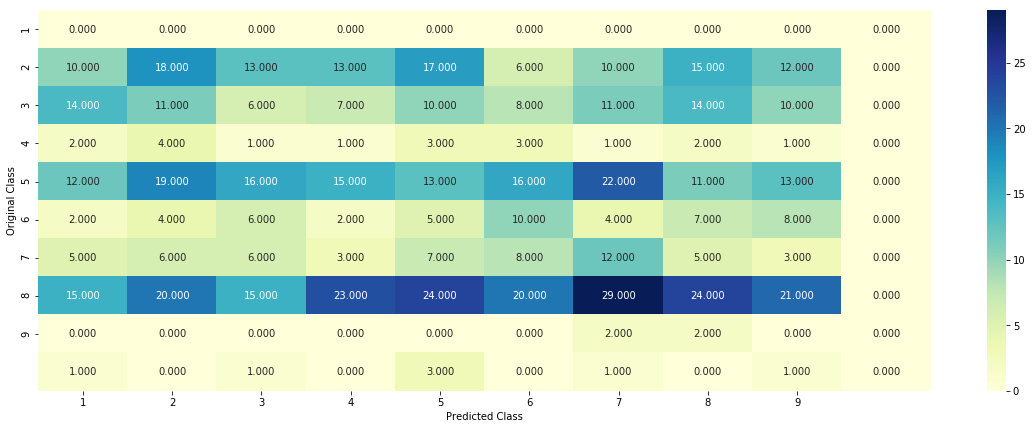

-------------------- Precision matrix (Columm Sum=1) --------------------


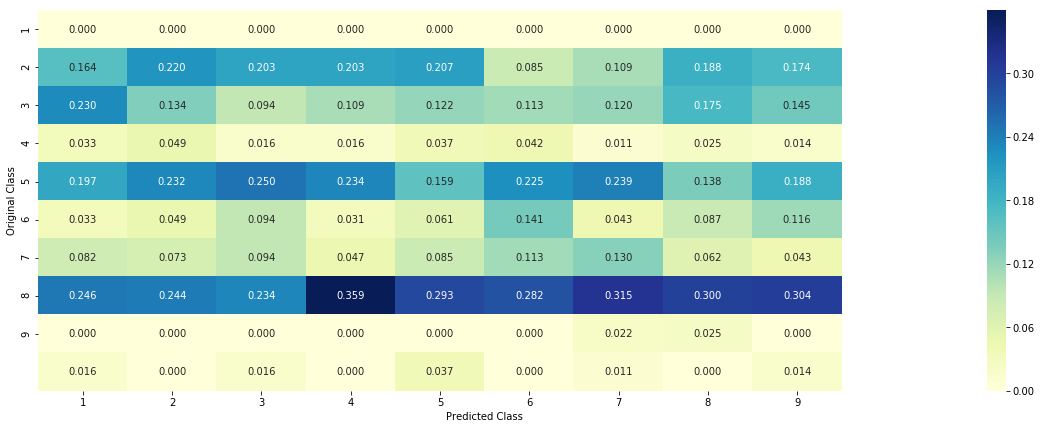

-------------------- Recall matrix (Row sum=1) --------------------


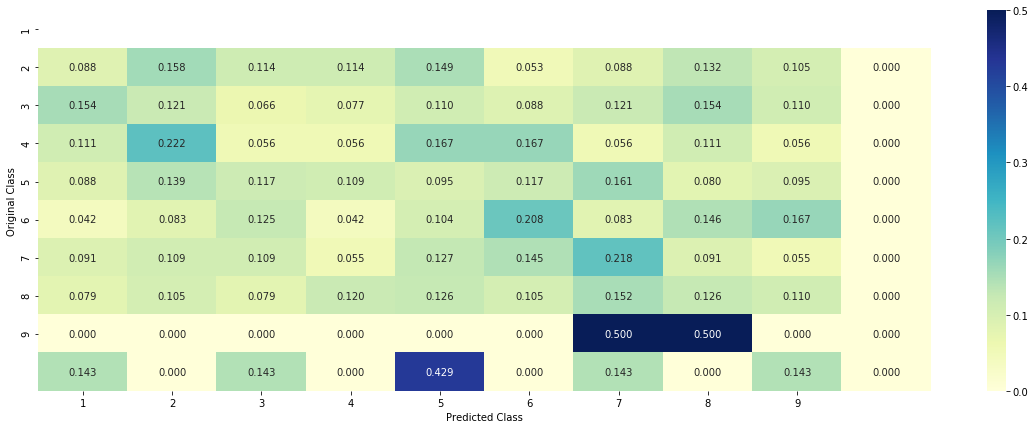

In [278]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

### Feature Importance

### Correctly Classified point

In [279]:
# test_point_index = 10
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 2
Predicted Class Probabilities: [[0.0738 0.4605 0.0098 0.0254 0.0344 0.0346 0.35   0.0057 0.0059]]
Actual Class : 1
--------------------------------------------------
0 Text feature [kinase] present in test data point [True]
1 Text feature [activating] present in test data point [True]
2 Text feature [tyrosine] present in test data point [True]
4 Text feature [inhibitors] present in test data point [True]
5 Text feature [function] present in test data point [True]
7 Text feature [inhibitor] present in test data point [True]
8 Text feature [activation] present in test data point [True]
9 Text feature [activated] present in test data point [True]
10 Text feature [phosphorylation] present in test data point [True]
11 Text feature [missense] present in test data point [True]
12 Text feature [treatment] present in test data point [True]
13 Text feature [loss] present in test data point [True]
19 Text feature [therapeutic] present in test data point [True]
20 Text feature 

### Incorrectly Classified point

In [280]:
test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actuall Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[0.0254 0.005  0.0043 0.0144 0.1702 0.7694 0.0092 0.0014 0.0008]]
Actuall Class : 6
--------------------------------------------------
5 Text feature [function] present in test data point [True]
8 Text feature [activation] present in test data point [True]
11 Text feature [missense] present in test data point [True]
13 Text feature [loss] present in test data point [True]
14 Text feature [deleterious] present in test data point [True]
17 Text feature [pathogenic] present in test data point [True]
18 Text feature [brca1] present in test data point [True]
19 Text feature [therapeutic] present in test data point [True]
23 Text feature [functional] present in test data point [True]
24 Text feature [yeast] present in test data point [True]
28 Text feature [protein] present in test data point [True]
29 Text feature [variants] present in test data point [True]
31 Text feature [cells] present in test data point [True]
36 Text feature [brca] p

## 6.5.1 Random Forest with Response Coding

#### Hyper parameter tuning (with Response coding)

In [281]:
alpha = [10,50,100,200,500,1000]
max_depth = [2,3,5,10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_responseCoding, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_responseCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 
'''
fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/4)],max_depth[int(i%4)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 10 and max depth =  2
Log Loss : 2.090855029711849
for n_estimators = 10 and max depth =  3
Log Loss : 1.6455410751319877
for n_estimators = 10 and max depth =  5
Log Loss : 1.4607187660267016
for n_estimators = 10 and max depth =  10
Log Loss : 1.8765372939510137
for n_estimators = 50 and max depth =  2
Log Loss : 1.670044704657052
for n_estimators = 50 and max depth =  3
Log Loss : 1.3645954774744635
for n_estimators = 50 and max depth =  5
Log Loss : 1.3296076094975864
for n_estimators = 50 and max depth =  10
Log Loss : 1.7549760176743838
for n_estimators = 100 and max depth =  2
Log Loss : 1.5249227083389962
for n_estimators = 100 and max depth =  3
Log Loss : 1.3760836076213527
for n_estimators = 100 and max depth =  5
Log Loss : 1.1638425531786167
for n_estimators = 100 and max depth =  10
Log Loss : 1.8197596049889744
for n_estimators = 200 and max depth =  2
Log Loss : 1.6019063449995423
for n_estimators = 200 and max depth =  3
Log Loss : 1.4145204808841627

<h3>Testing model with best hyper parameters (Response Coding)</h3>

Log loss : 1.1638425531786167
Number of mis-classified points : 0.38533834586466165
-------------------- Confusion matrix --------------------


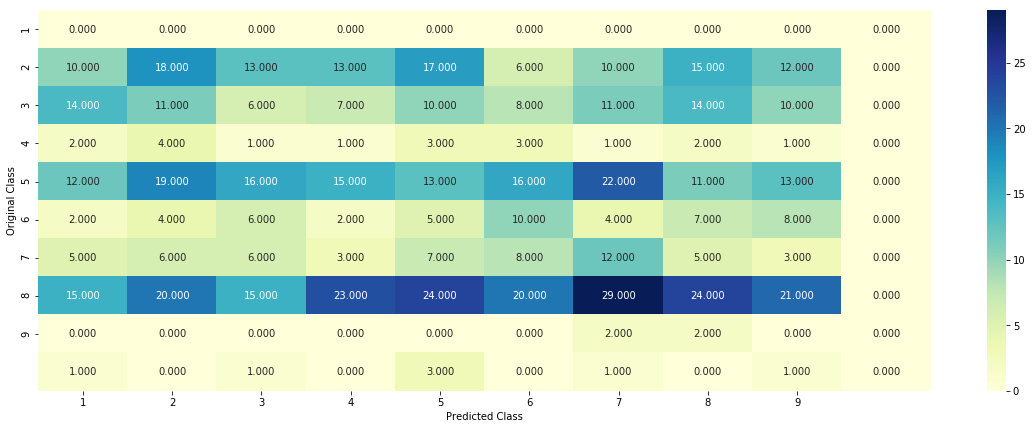

-------------------- Precision matrix (Columm Sum=1) --------------------


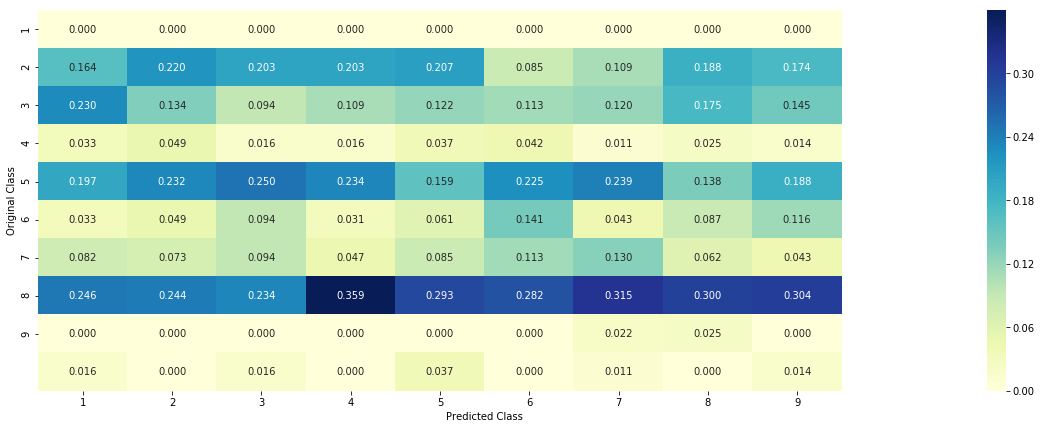

-------------------- Recall matrix (Row sum=1) --------------------


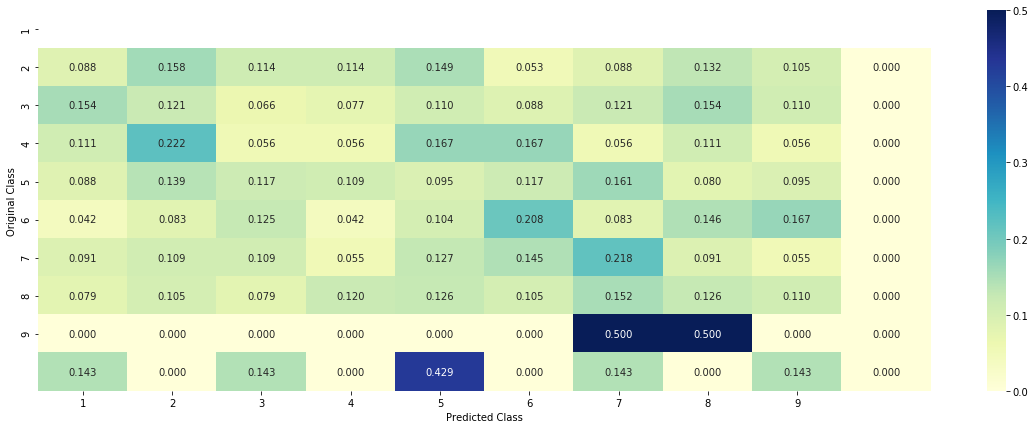

In [283]:

clf = RandomForestClassifier(max_depth=max_depth[int(best_alpha%4)], n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_features='auto',random_state=42)
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y,cv_x_responseCoding,cv_y, clf)

# Feature Importence

#### Correctly classified

In [284]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)


test_point_index = 1
no_feature = 27
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 1
Predicted Class Probabilities: [[0.8068 0.0272 0.0127 0.0821 0.0054 0.0274 0.0132 0.0173 0.0079]]
Actual Class : 1
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Text is important feature
Gene is important feature
Variation is important feature
Gene is important feature
Text is important feature
Gene is important feature
Variation is important feature
Gene is important feature
Text is important feature
Text is important feature
Variation is important feature
Text is important feature
Gene is important feature
Gene is important feature
Gene is important feature


#### Incorrectly Classified

In [285]:
test_point_index = 100
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 6
Predicted Class Probabilities: [[0.013  0.0029 0.0118 0.0131 0.0943 0.8541 0.0017 0.0052 0.004 ]]
Actual Class : 6
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Text is important feature
Gene is important feature
Variation is important feature
Gene is important feature
Text is important feature
Gene is important feature
Variation is important feature
Gene is important feature
Text is important feature
Text is important feature
Variation is important feature
Text is important feature
Gene is important feature
Gene is important feature
Gene is important feature


# 6.6 Stack the models

### testing with hyper parameter tuning

In [286]:
clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_onehotCoding, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_onehotCoding, train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(train_x_onehotCoding, train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_x_onehotCoding, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotCoding))))
sig_clf2.fit(train_x_onehotCoding, train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotCoding))))
sig_clf3.fit(train_x_onehotCoding, train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotCoding))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_onehotCoding, train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))))
    log_error =log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 0.93
Support vector machines : Log Loss: 1.87
Naive Bayes : Log Loss: 1.10
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 2.178
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 2.037
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.501
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.047
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.029
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.147


#### Testing with best hyper parameters

Log loss (train) on the stacking classifier : 0.8347321624434845
Log loss (CV) on the stacking classifier : 1.0465529747996685
Log loss (test) on the stacking classifier : 1.0944522828531913
Number of missclassified point : 0.34887218045112783
-------------------- Confusion matrix --------------------


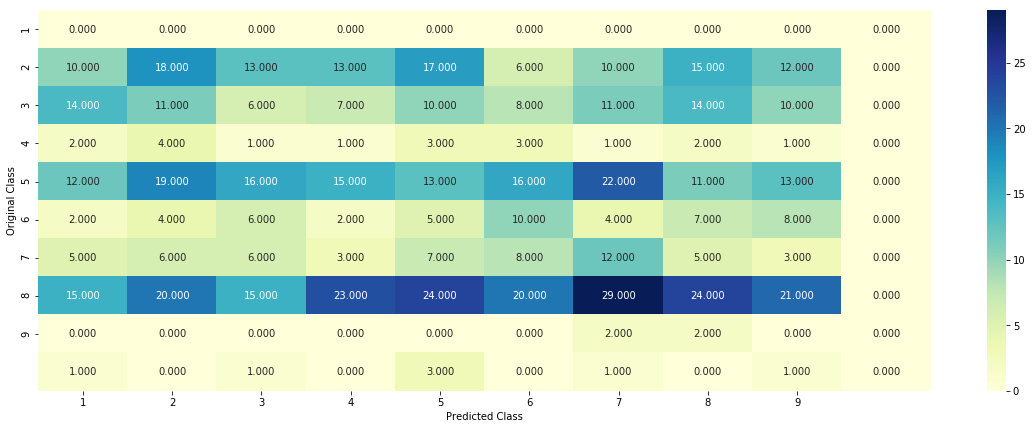

-------------------- Precision matrix (Columm Sum=1) --------------------


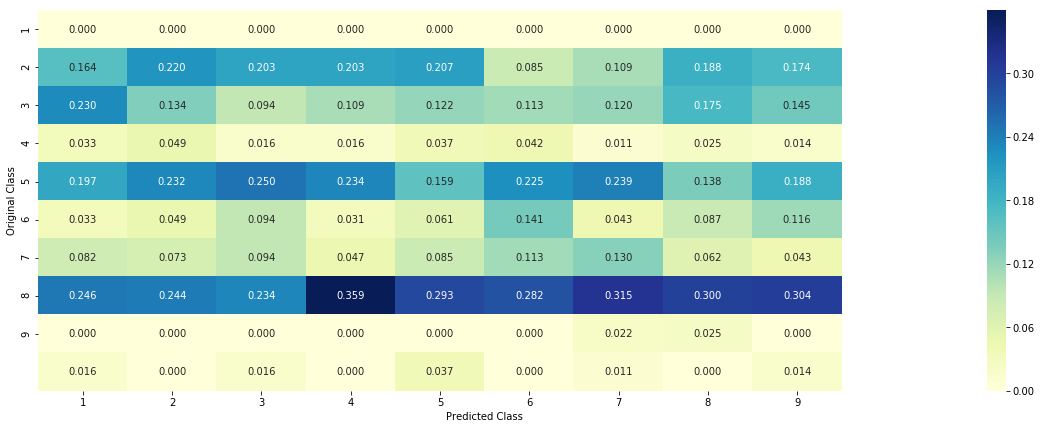

-------------------- Recall matrix (Row sum=1) --------------------


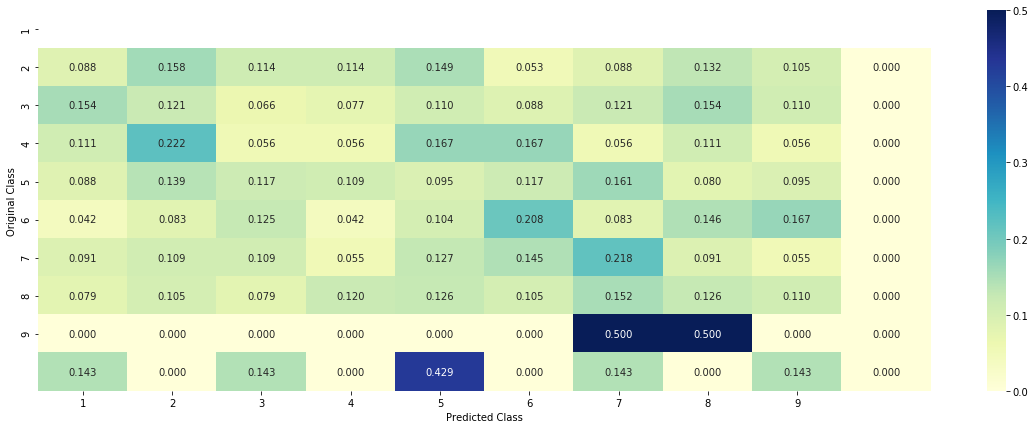

In [287]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_onehotCoding, train_y)

log_error = log_loss(train_y, sclf.predict_proba(train_x_onehotCoding))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(test_y, sclf.predict_proba(test_x_onehotCoding))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=sclf.predict(test_x_onehotCoding))

# 6.7 Maximum Voting Classifier

Log loss (train) on the VotingClassifier : 0.9761001884831279
Log loss (CV) on the VotingClassifier : 1.136053821437602
Log loss (test) on the VotingClassifier : 1.1711515951666593
Number of missclassified point : 0.3458646616541353
-------------------- Confusion matrix --------------------


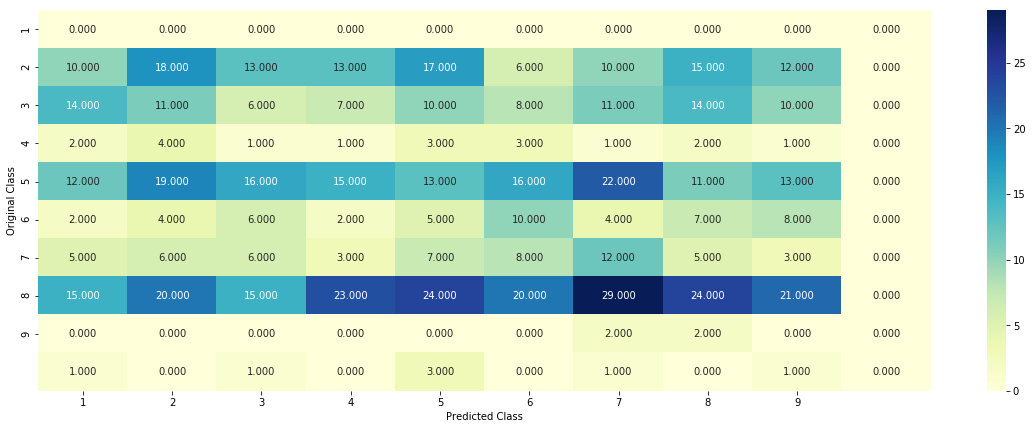

-------------------- Precision matrix (Columm Sum=1) --------------------


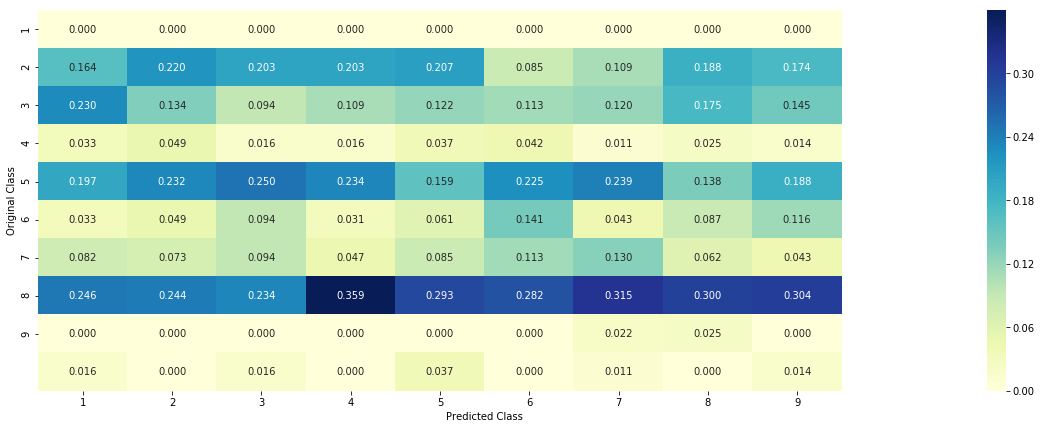

-------------------- Recall matrix (Row sum=1) --------------------


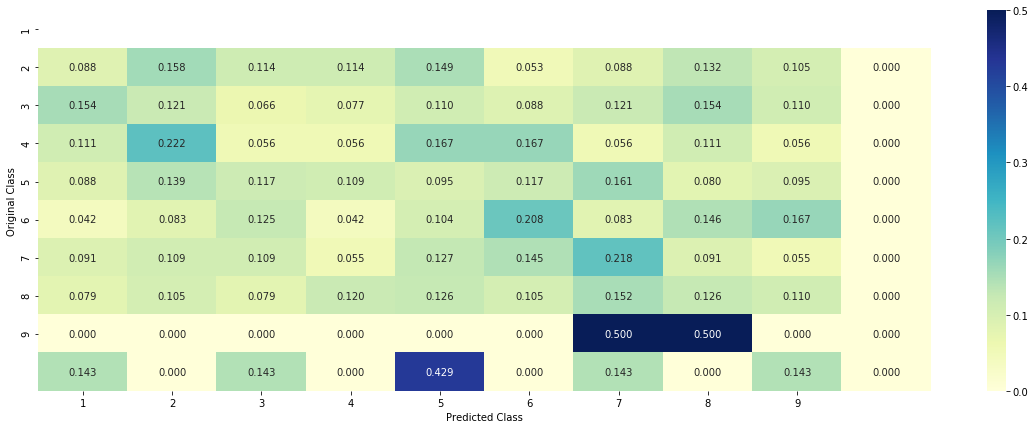

In [288]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(train_x_onehotCoding, train_y)
print("Log loss (train) on the VotingClassifier :", log_loss(train_y, vclf.predict_proba(train_x_onehotCoding)))
print("Log loss (CV) on the VotingClassifier :", log_loss(cv_y, vclf.predict_proba(cv_x_onehotCoding)))
print("Log loss (test) on the VotingClassifier :", log_loss(test_y, vclf.predict_proba(test_x_onehotCoding)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=vclf.predict(test_x_onehotCoding))

**Observations**

1. TFIDF with top 1000 words performed well compared to Bag of words

2. the best model was Logistic Regression with class balancing.

    **For alpha = 0.0001**
        - The train log loss is: 0.6108700233781955
        - The cross validation log loss is: 0.9264965329795839
        - The test log loss is: 1.0096660488844744

# 7. Logistic regression with CountVectorizer Features (Unigrams and Bigrams)

In [289]:
#Making one_hot encoding features for logistic regression model by count vectorizer using unigram and bigram
# since most of the gene and variation has max of one word bi grams are not used in those features

# one-hot encoding of Gene feature
gene_vectorizer_LR = CountVectorizer()
train_gene_feature_onehotCoding_LR = gene_vectorizer_LR.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding_LR = gene_vectorizer_LR.transform(test_df['Gene'])
cv_gene_feature_onehotCoding_LR = gene_vectorizer_LR.transform(cv_df['Gene'])

# one-hot encoding of variation feature.
variation_vectorizer_LR = CountVectorizer()
train_variation_feature_onehotCoding_LR = variation_vectorizer_LR.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding_LR = variation_vectorizer_LR.transform(test_df['Variation'])
cv_variation_feature_onehotCoding_LR = variation_vectorizer_LR.transform(cv_df['Variation'])

#one-hot encoding for Text feature
text_vectorizer_LR = CountVectorizer(ngram_range=(1, 2))
train_text_feature_onehotCoding_LR = text_vectorizer_LR.fit_transform(train_df['TEXT'])
train_text_feature_onehotCoding_LR = normalize(train_text_feature_onehotCoding_LR ,axis=0)

test_text_feature_onehotCoding_LR = text_vectorizer_LR.transform(test_df['TEXT'])
test_text_feature_onehotCoding_LR = normalize(test_text_feature_onehotCoding_LR ,axis=0)

cv_text_feature_onehotCoding_LR = text_vectorizer_LR.transform(cv_df['TEXT'])
cv_text_feature_onehotCoding_LR = normalize(cv_text_feature_onehotCoding_LR ,axis=0)

#stacking all the features(gene,vartions,text of one-hot encoded)
train_gene_var_onehotCoding_LR = hstack((train_gene_feature_onehotCoding_LR ,train_variation_feature_onehotCoding_LR))
test_gene_var_onehotCoding_LR = hstack((test_gene_feature_onehotCoding_LR,test_variation_feature_onehotCoding_LR))
cv_gene_var_onehotCoding_LR = hstack((cv_gene_feature_onehotCoding_LR,cv_variation_feature_onehotCoding_LR))

train_x_onehotCoding_LR = hstack((train_gene_var_onehotCoding_LR, train_text_feature_onehotCoding_LR)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding_LR = hstack((test_gene_var_onehotCoding_LR, test_text_feature_onehotCoding_LR)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding_LR = hstack((cv_gene_var_onehotCoding_LR, cv_text_feature_onehotCoding_LR)).tocsr()
cv_y = np.array(list(cv_df['Class']))

print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding_LR.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding_LR.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding_LR.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 2378668)
(number of data points * number of features) in test data =  (665, 2378668)
(number of data points * number of features) in cross validation data = (532, 2378668)


## 7.1 With Class Balancing

## Hyper Parameter tuning

for alpha = 1e-06
Log Loss : 1.5840937706017373
for alpha = 1e-05
Log Loss : 1.575865068790144
for alpha = 0.0001
Log Loss : 1.5718725681268386
for alpha = 0.001
Log Loss : 1.5294009280940324
for alpha = 0.01
Log Loss : 1.2189957284500241
for alpha = 0.1
Log Loss : 1.1643644801266702
for alpha = 1
Log Loss : 1.1815309980692188
for alpha = 10
Log Loss : 1.2555953805410724
for alpha = 100
Log Loss : 1.279035806710503


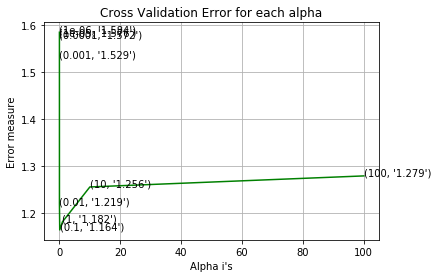

For values of best alpha =  0.1 The train log loss is: 0.669164718949831
For values of best alpha =  0.1 The cross validation log loss is: 1.1643644801266702
For values of best alpha =  0.1 The test log loss is: 1.1950242794098693


In [290]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding_LR, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding_LR, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding_LR)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding_LR, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding_LR, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding_LR)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding_LR)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding_LR)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

## Testing with best hyper params

Log loss : 1.1643644801266702
Number of mis-classified points : 0.3966165413533835
-------------------- Confusion matrix --------------------


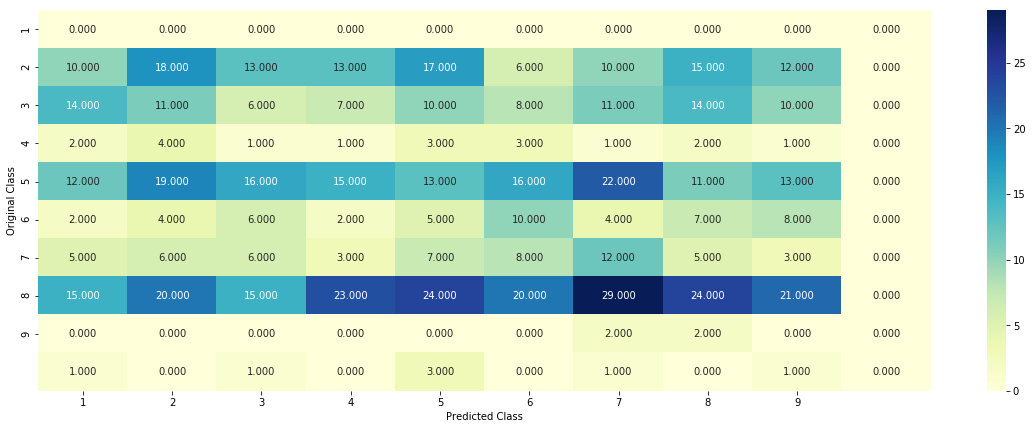

-------------------- Precision matrix (Columm Sum=1) --------------------


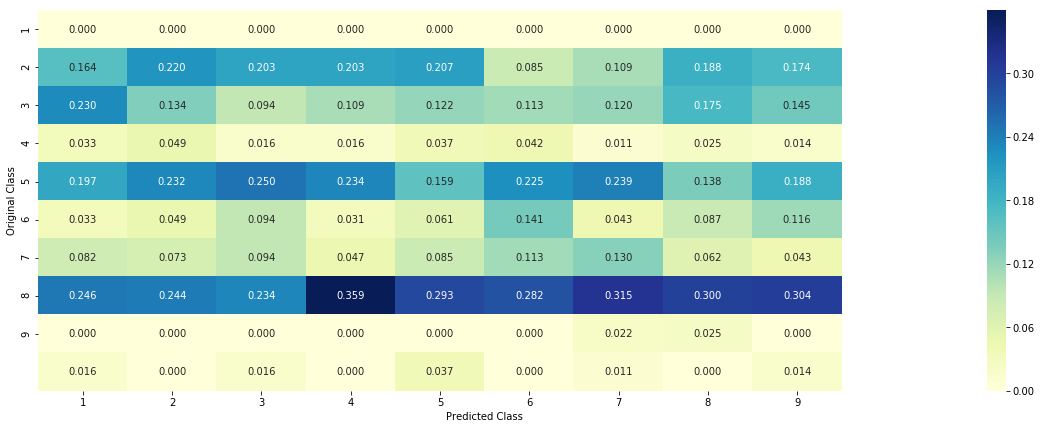

-------------------- Recall matrix (Row sum=1) --------------------


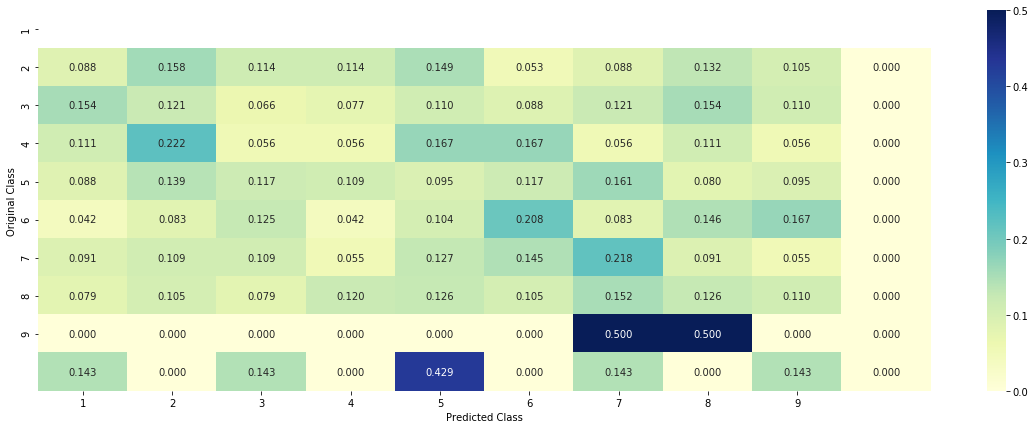

In [291]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding_LR, train_y, cv_x_onehotCoding_LR, cv_y, clf)

## Feature Importance

In [292]:
def get_impfeature_names_LR(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = CountVectorizer(ngram_range=(1, 2))
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_count_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

### Incorrectly Classified point

In [294]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding_LR[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding_LR[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names_LR(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0583 0.1156 0.0029 0.0396 0.0107 0.0026 0.7269 0.0356 0.0078]]
Actual Class : 1
--------------------------------------------------
452 Text feature [00] present in test data point [True]
Out of the top  500  features  1 are present in query point


### correctly Classified point

In [296]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding_LR[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding_LR[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names_LR(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[7.700e-03 6.000e-03 7.000e-04 3.000e-03 2.880e-02 9.459e-01 2.800e-03
  4.200e-03 8.000e-04]]
Actual Class : 6
--------------------------------------------------
Out of the top  500  features  0 are present in query point


## 7.2 Without Class Balancing

### Hyper parameter tuning

for alpha = 1e-06
Log Loss : 1.4944129554235677
for alpha = 1e-05
Log Loss : 1.4926177117001114
for alpha = 0.0001
Log Loss : 1.5176819273227213
for alpha = 0.001
Log Loss : 1.4710580239428788
for alpha = 0.01
Log Loss : 1.218667987097071
for alpha = 0.1
Log Loss : 1.170844457664913
for alpha = 1
Log Loss : 1.1960709296901582


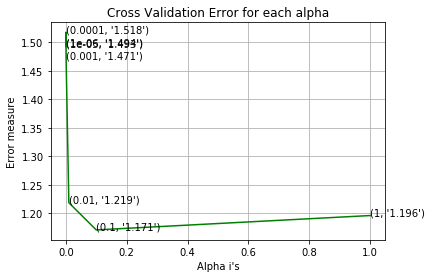

For values of best alpha =  0.1 The train log loss is: 0.6624971137162552
For values of best alpha =  0.1 The cross validation log loss is: 1.170844457664913
For values of best alpha =  0.1 The test log loss is: 1.2111714080667675


In [297]:
alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding_LR, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding_LR, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding_LR)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding_LR, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding_LR, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding_LR)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding_LR)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding_LR)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

## Testing model with best hyper parameter

Log loss : 1.170844457664913
Number of mis-classified points : 0.38345864661654133
-------------------- Confusion matrix --------------------


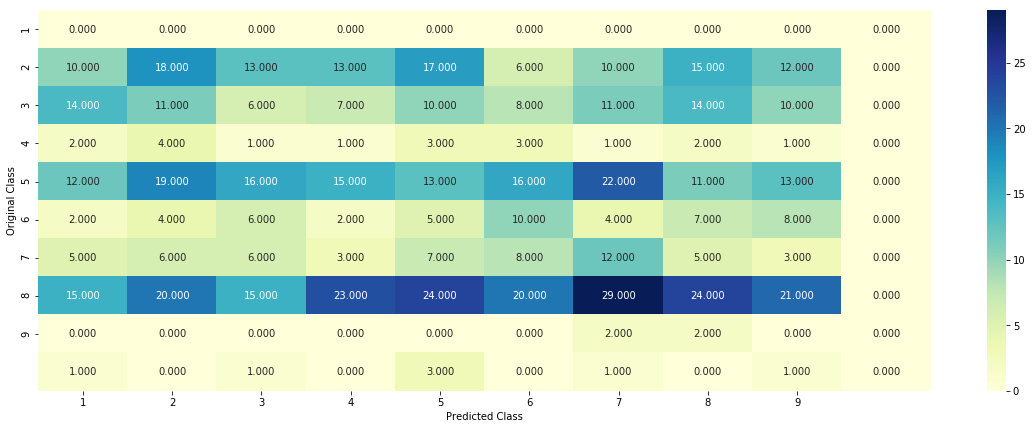

-------------------- Precision matrix (Columm Sum=1) --------------------


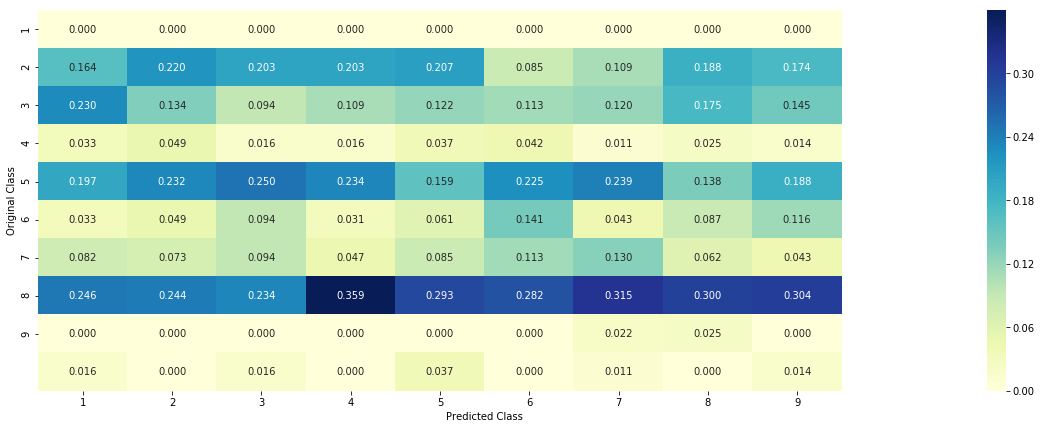

-------------------- Recall matrix (Row sum=1) --------------------


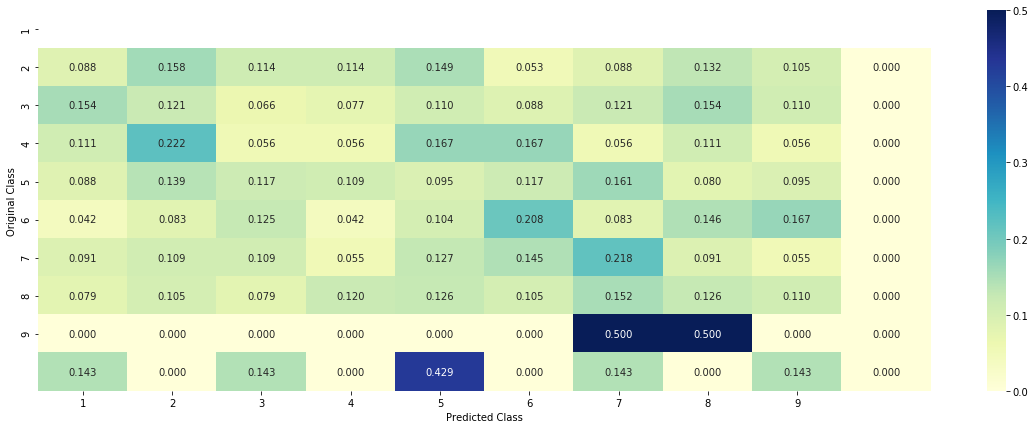

In [298]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding_LR, train_y, cv_x_onehotCoding_LR, cv_y, clf)

### Feature Importance, Correctly Classified point

In [299]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding_LR[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding_LR[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names_LR(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0318 0.0674 0.0036 0.0238 0.0073 0.001  0.8618 0.0031 0.    ]]
Actual Class : 1
--------------------------------------------------
452 Text feature [00] present in test data point [True]
Out of the top  500  features  1 are present in query point


### Feature Importance, Incorrectly Classified point

In [300]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding_LR[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding_LR[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names_LR(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[0.0086 0.0066 0.0016 0.0025 0.0213 0.9557 0.0026 0.001  0.    ]]
Actual Class : 6
--------------------------------------------------
Out of the top  500  features  0 are present in query point


# 8. Logistic Regression with feature engineering on TFIDF

In [301]:
# applying Feature engineering on one hot coding data
train_x_onehotCodingFE=np.sqrt(train_x_onehotCoding)
test_x_onehotCodingFE=np.sqrt(test_x_onehotCoding)
cv_x_onehotCodingFE=np.sqrt(cv_x_onehotCoding)

### Finding the best Hyper parameter

for alpha = 1e-06
Log Loss : 1.064048850423215
for alpha = 1e-05
Log Loss : 1.0434586895522764
for alpha = 0.0001
Log Loss : 1.024249749096585
for alpha = 0.001
Log Loss : 0.9296712307367787
for alpha = 0.01
Log Loss : 1.03870007818768
for alpha = 0.1
Log Loss : 1.6049566074997288
for alpha = 1
Log Loss : 1.8653579304689816
for alpha = 10
Log Loss : 1.8781622612342335
for alpha = 100
Log Loss : 1.8790808769492255


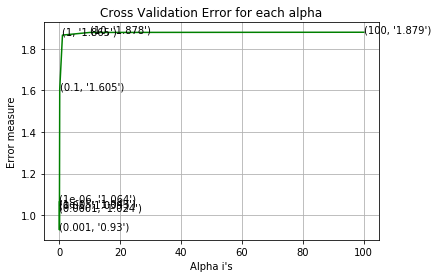

For values of best alpha =  0.001 The train log loss is: 0.6915408532176911
For values of best alpha =  0.001 The cross validation log loss is: 0.9296712307367787
For values of best alpha =  0.001 The test log loss is: 0.9851335040941731


In [302]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCodingFE, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCodingFE, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCodingFE)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCodingFE, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCodingFE, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCodingFE)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCodingFE)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCodingFE)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

### Testing Model with best Hyper parameters

Log loss : 0.9851335040941731
Number of mis-classified points : 0.3293233082706767
-------------------- Confusion matrix --------------------


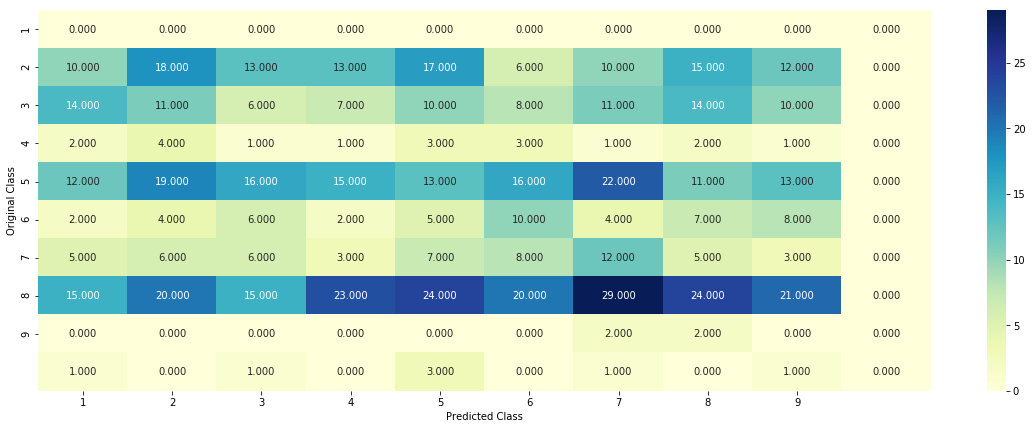

-------------------- Precision matrix (Columm Sum=1) --------------------


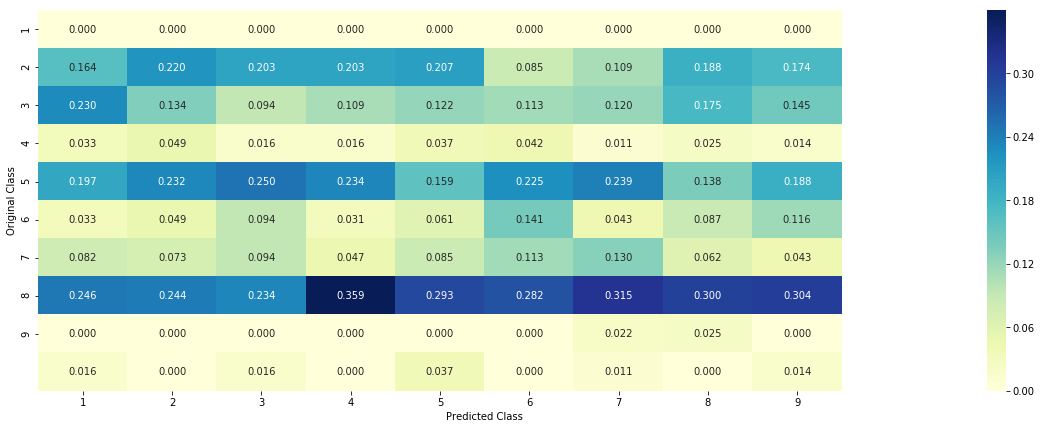

-------------------- Recall matrix (Row sum=1) --------------------


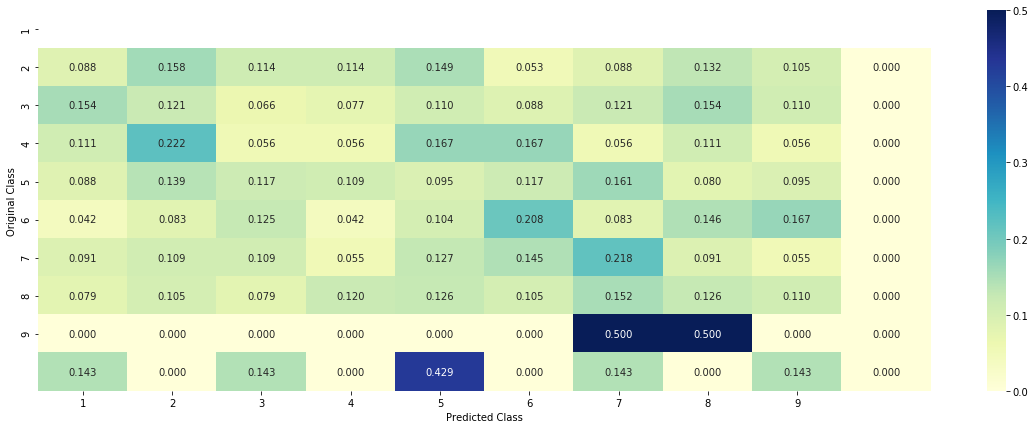

In [303]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCodingFE, train_y, test_x_onehotCodingFE, test_y, clf)

#### Correctly Classified point

In [304]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.4251 0.1744 0.014  0.0349 0.0386 0.0853 0.2047 0.0064 0.0165]]
Actual Class : 1
--------------------------------------------------
11 Text feature [hotspots] present in test data point [True]
21 Text feature [transcriptional] present in test data point [True]
24 Text feature [specificity] present in test data point [True]
27 Text feature [defined] present in test data point [True]
31 Text feature [peptide] present in test data point [True]
33 Text feature [structure] present in test data point [True]
34 Text feature [panel] present in test data point [True]
35 Text feature [position] present in test data point [True]
38 Text feature [author] present in test data point [True]
40 Text feature [page] present in test data point [True]
49 Text feature [subunit] present in test data point [True]
52 Text feature [brain] present in test data point [True]
61 Text feature [corresponding] present in test data point [True]
65 Text feature [cal

### Incorrectly Classified point

In [305]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[0.117  0.0758 0.0153 0.1129 0.1191 0.4548 0.0956 0.0047 0.0049]]
Actual Class : 6
--------------------------------------------------
6 Text feature [ligase] present in test data point [True]
10 Text feature [brca] present in test data point [True]
11 Text feature [values] present in test data point [True]
14 Text feature [ring] present in test data point [True]
38 Text feature [substitutions] present in test data point [True]
39 Text feature [57] present in test data point [True]
50 Text feature [odds] present in test data point [True]
63 Text feature [basis] present in test data point [True]
76 Text feature [deleterious] present in test data point [True]
77 Text feature [dose] present in test data point [True]
80 Text feature [substitution] present in test data point [True]
87 Text feature [ovarian] present in test data point [True]
88 Text feature [history] present in test data point [True]
99 Text feature [models] present in test 

# Results

In [9]:
from prettytable import PrettyTable
x = PrettyTable()

x.title = 'Best Model with TFIDF Vectorizer'
x.field_names = ["MODEL", "Hyperparams", "Train-log-loss", "Cv-log-loss", "Test-log-loss", 'Misclassified points[%]' ]
#
x.add_row(['ML Models With TFIDFVectorizer','--'*5,'--'*5,'--'*5, '--'*5, '--'*5])
x.add_row(['Naive-Bayes', 'alpha=0.1', 0.82, 1.09, 1.15, 33.45])
x.add_row(['KNN', 'alpha=15', 0.71, 0.94, 1.04, 33.27])
x.add_row(['Logistic- Regression \n Class balanced', 'alpha=0.0001', 0.61, 0.92, 1.01, 32.33])
x.add_row(['Logistic- Regression \n Class unbalanced', 'alpha=0.0001', 0.60, 0.98, 1.04, 32.7])
x.add_row(['Linear-SVM', 'alpha=0.0001', 0.68, 1.05, 1.09, 36.46])
x.add_row(['Random Forest \n onehotcoding', 'alpha=2000', 0.86, 1.17, 1.19, 42.10])
x.add_row(['Random Forest \n Response Coding', 'alpha=100', 0.04, 1.16, 1.28, 38.53])
x.add_row(['Max-Voting Classifier', 'alpha=0.1', 0.97, 1.13, 1.17, 34.58])
x.add_row(['--'*5,'--'*5,'--'*5,'--'*5, '--'*5, '--'*5])
x.add_row(['Logistic- Regression \n with unigram and bigrams', 'alpha=0.1', 0.67, 1.16, 1.19, 39.66])
x.add_row(['--'*5,'--'*5,'--'*5,'--'*5, '--'*5, '--'*5])
x.add_row(['Logistic- Regression \n with Feature Engineering', 'alpha=0.001', 0.69, 0.92, 0.98, 32.93 ])
x.border=True
print(x)

+------------------------------------------------------------------------------------------------------------------------+
|                                            Best Model with TFIDF Vectorizer                                            |
+--------------------------------+--------------+----------------+-------------+---------------+-------------------------+
|             MODEL              | Hyperparams  | Train-log-loss | Cv-log-loss | Test-log-loss | Misclassified points[%] |
+--------------------------------+--------------+----------------+-------------+---------------+-------------------------+
| ML Models With TFIDFVectorizer |  ----------  |   ----------   |  ---------- |   ----------  |        ----------       |
|          Naive-Bayes           |  alpha=0.1   |      0.82      |     1.09    |      1.15     |          33.45          |
|              KNN               |   alpha=15   |      0.71      |     0.94    |      1.04     |          33.27          |
|     Logistic- 

**OBSERVATIONS**


1. Out of 7 ML models the top three were 
       - Logistic Regression with class balanced
       - Logistic Regression with class unbalanced
       - KNN(But cannot get probablistic Score so, not interpretable)


2. When Feature Engineering Technique like taking square root on data is done the log loss reduced to less than 1 and gave best model with log loss of 0.98



3. Logistic Regression with unigram & Bigram were good but misclassification rate was high than any other featurizers.